<a href="https://colab.research.google.com/github/ParkJongHyeok99/Data_Analysis_Airbnb/blob/main/Data_Analysis_Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

google colab 연동 및 데이터 전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

source_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/nyc-rolling-sales.csv')
source_data.shape

(84548, 22)

In [ ]:
delete_columns_data = source_data.drop(['Unnamed: 0', 'BLOCK', 'LOT', 'EASE-MENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'BUILDING CLASS AT TIME OF SALE', 'SALE DATE', 'NEIGHBORHOOD', 'TAX CLASS AT PRESENT'], axis=1)
delete_columns_data.shape

(84548, 9)

In [ ]:
delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BOROUGH                    84548 non-null  int64 
 1   BUILDING CLASS CATEGORY    84548 non-null  object
 2   BUILDING CLASS AT PRESENT  84548 non-null  object
 3   TOTAL UNITS                84548 non-null  int64 
 4   LAND SQUARE FEET           84548 non-null  object
 5   GROSS SQUARE FEET          84548 non-null  object
 6   YEAR BUILT                 84548 non-null  int64 
 7   TAX CLASS AT TIME OF SALE  84548 non-null  int64 
 8   SALE PRICE                 84548 non-null  object
dtypes: int64(4), object(5)
memory usage: 5.8+ MB


In [ ]:
# '-'가 있는 행 찾기
rows_with_minus_sign = delete_columns_data[delete_columns_data.apply(lambda row: ' -  ' in row.values, axis=1)]

# 해당 행을 삭제
delete_columns_data = delete_columns_data.drop(rows_with_minus_sign.index)

delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48244 entries, 0 to 84547
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BOROUGH                    48244 non-null  int64 
 1   BUILDING CLASS CATEGORY    48244 non-null  object
 2   BUILDING CLASS AT PRESENT  48244 non-null  object
 3   TOTAL UNITS                48244 non-null  int64 
 4   LAND SQUARE FEET           48244 non-null  object
 5   GROSS SQUARE FEET          48244 non-null  object
 6   YEAR BUILT                 48244 non-null  int64 
 7   TAX CLASS AT TIME OF SALE  48244 non-null  int64 
 8   SALE PRICE                 48244 non-null  object
dtypes: int64(4), object(5)
memory usage: 3.7+ MB


In [ ]:
# 구간 변수 TOTAL UNITS, LAND SQUARE FEET, GROSS SQUARE FEET, YEAR BUILT, SALE PRICE  (5)

# 구간 변수 타입 변경
delete_columns_data['LAND SQUARE FEET'] = delete_columns_data['LAND SQUARE FEET'].astype(int)
delete_columns_data['GROSS SQUARE FEET'] = delete_columns_data['GROSS SQUARE FEET'].astype(int)
delete_columns_data['SALE PRICE'] = delete_columns_data['SALE PRICE'].astype(int)

In [ ]:
# 범주형 변수 BOROUGH, BUILDING CLASS CATEGORY, BUILDING CLASS AT PRESENT, TAX CLASS AT TIME OF SALE, PRICE_B (5)

# 타겟 변수 값이 중위수 이상이면 1, 아니면 0
# 이진값 타겟 변수 PRICE_B
c1 = delete_columns_data['SALE PRICE'] >= delete_columns_data['SALE PRICE'].median()
c0 = delete_columns_data['SALE PRICE'] < delete_columns_data['SALE PRICE'].median()

delete_columns_data.loc[c1, "PRICE_B"] = 1
delete_columns_data.loc[c0, "PRICE_B"] = 0
delete_columns_data.head(3)

,BOROUGH,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,PRICE_B
0,1,07 RENTALS - WALKUP APARTMENTS,C2,5,1633,6440,1900,2,6625000,1.0
3,1,07 RENTALS - WALKUP APARTMENTS,C4,10,2272,6794,1913,2,3936272,1.0
4,1,07 RENTALS - WALKUP APARTMENTS,C2,6,2369,4615,1900,2,8000000,1.0


In [ ]:
delete_columns_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/delete_columns_data.csv', index=False)

타겟 변수 설정

In [ ]:
# SALE PRICE 변수 object에서 float로 변환
import pandas as pd

delete_columns_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/delete_columns_data.csv')
delete_columns_data['SALE PRICE'] = delete_columns_data['SALE PRICE'].astype(int)

delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48244 entries, 0 to 48243
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BOROUGH                    48244 non-null  int64  
 1   BUILDING CLASS CATEGORY    48244 non-null  object 
 2   BUILDING CLASS AT PRESENT  48244 non-null  object 
 3   TOTAL UNITS                48244 non-null  int64  
 4   LAND SQUARE FEET           48244 non-null  int64  
 5   GROSS SQUARE FEET          48244 non-null  int64  
 6   YEAR BUILT                 48244 non-null  int64  
 7   TAX CLASS AT TIME OF SALE  48244 non-null  int64  
 8   SALE PRICE                 48244 non-null  int64  
 9   PRICE_B                    48244 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 3.7+ MB


In [ ]:
delete_columns_data['PRICE_B'] = delete_columns_data['PRICE_B'].astype('object')
delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48244 entries, 0 to 48243
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BOROUGH                    48244 non-null  int64 
 1   BUILDING CLASS CATEGORY    48244 non-null  object
 2   BUILDING CLASS AT PRESENT  48244 non-null  object
 3   TOTAL UNITS                48244 non-null  int64 
 4   LAND SQUARE FEET           48244 non-null  int64 
 5   GROSS SQUARE FEET          48244 non-null  int64 
 6   YEAR BUILT                 48244 non-null  int64 
 7   TAX CLASS AT TIME OF SALE  48244 non-null  int64 
 8   SALE PRICE                 48244 non-null  int64 
 9   PRICE_B                    48244 non-null  object
dtypes: int64(7), object(3)
memory usage: 3.7+ MB


이상값 제거(구간 변수)

<Axes: xlabel='SALE PRICE'>

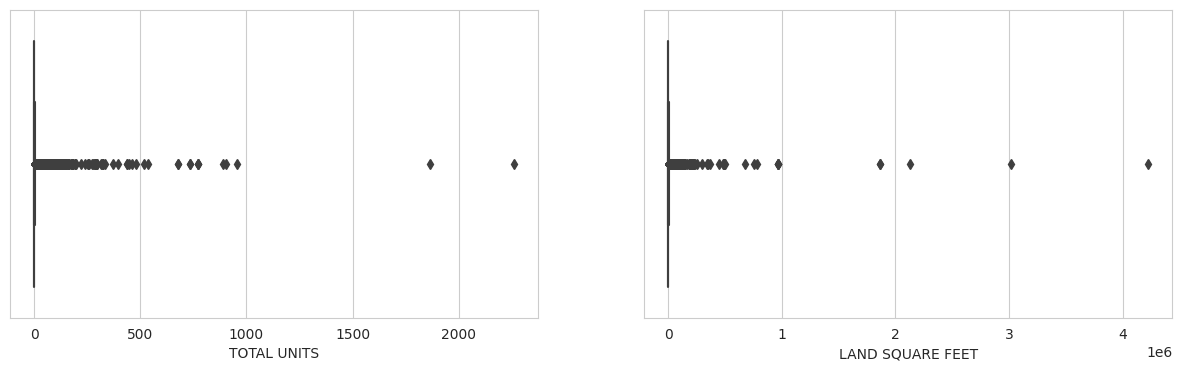

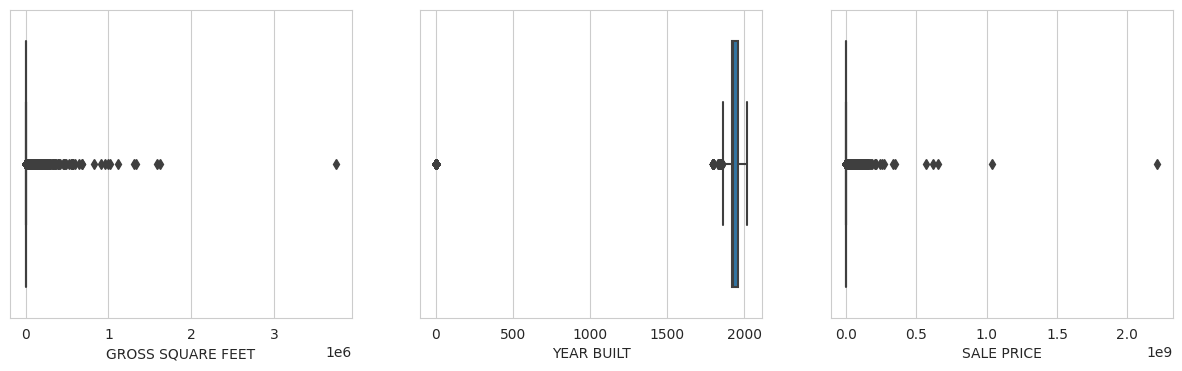

In [ ]:
# 구간 변수 이상값 확인 및 제거

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'TOTAL UNITS', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'LAND SQUARE FEET', data = delete_columns_data)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'GROSS SQUARE FEET', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'YEAR BUILT', data = delete_columns_data)
sns.boxplot(ax = axes[2], x = 'SALE PRICE', data = delete_columns_data)

In [ ]:
Q1 = delete_columns_data[['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']].quantile(0.25)
Q3 = delete_columns_data[['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

TOTAL UNITS               1.0
LAND SQUARE FEET       1658.0
GROSS SQUARE FEET      1692.0
YEAR BUILT               41.0
SALE PRICE           749580.0
dtype: float64


In [ ]:
Lower = Q1 - 1.5 * IQR
Upper = Q3 + 1.5 * IQR
print(Lower)
print(Upper)

TOTAL UNITS               -0.5
LAND SQUARE FEET       -1074.0
GROSS SQUARE FEET      -1710.0
YEAR BUILT              1858.5
SALE PRICE          -1043950.0
dtype: float64
TOTAL UNITS                3.5
LAND SQUARE FEET        5558.0
GROSS SQUARE FEET       5058.0
YEAR BUILT              2022.5
SALE PRICE           1954370.0
dtype: float64


In [ ]:
c1 = (delete_columns_data['TOTAL UNITS'] >= -0.5) & (delete_columns_data['TOTAL UNITS'] <= 3.5)
c2 = (delete_columns_data['LAND SQUARE FEET'] >= -1074.0) & (delete_columns_data['LAND SQUARE FEET'] <= 5558.0)
c3 = (delete_columns_data['GROSS SQUARE FEET'] >= -1710.0) & (delete_columns_data['GROSS SQUARE FEET'] <= 5058.0)
c4 = (delete_columns_data['YEAR BUILT'] >= 1858.5) & (delete_columns_data['YEAR BUILT'] <= 2022.5)
c5 = (delete_columns_data['SALE PRICE'] >= -1043950.0) & (delete_columns_data['SALE PRICE'] <= 1954370.0)

df = delete_columns_data[c1 & c2 & c3 & c4 & c5]
df.shape

(37237, 10)

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/preprocessing_completed.csv', index=False)

탐색적 자료 분석 및 시각화

결측값이 50% 초과인 변수 제거

In [ ]:
import pandas as pd


preprocessing_completed = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/preprocessing_completed.csv')
preprocessing_completed['PRICE_B'] = preprocessing_completed['PRICE_B'].astype('object')
preprocessing_completed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37237 entries, 0 to 37236
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BOROUGH                    37237 non-null  int64 
 1   BUILDING CLASS CATEGORY    37237 non-null  object
 2   BUILDING CLASS AT PRESENT  37237 non-null  object
 3   TOTAL UNITS                37237 non-null  int64 
 4   LAND SQUARE FEET           37237 non-null  int64 
 5   GROSS SQUARE FEET          37237 non-null  int64 
 6   YEAR BUILT                 37237 non-null  int64 
 7   TAX CLASS AT TIME OF SALE  37237 non-null  int64 
 8   SALE PRICE                 37237 non-null  int64 
 9   PRICE_B                    37237 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.8+ MB


구간 변수 요약 통계 검토

In [ ]:
interval_variable = preprocessing_completed[['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']]
interval_variable.describe()

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,37237.000000,37237.000000,37237.000000,37237.000000,3.723700e+04
mean,1.439831,2079.937562,1525.097672,1946.865027,4.908181e+05
std,0.819393,1393.243339,1051.142158,34.036405,4.103516e+05
min,0.000000,0.000000,0.000000,1865.000000,0.000000e+00
25%,1.000000,1417.000000,960.000000,1920.000000,1.400000e+05
50%,1.000000,2017.000000,1536.000000,1937.000000,4.598000e+05
75%,2.000000,2850.000000,2200.000000,1965.000000,7.250000e+05
max,3.000000,5554.000000,5025.000000,2017.000000,1.950000e+06


In [ ]:
# 구간 변수 왜도 확인
interval_variable.skew()

TOTAL UNITS          0.232459
LAND SQUARE FEET     0.071409
GROSS SQUARE FEET    0.174275
YEAR BUILT           0.623273
SALE PRICE           0.794076
dtype: float64

In [ ]:
# 첨도 확인
interval_variable.kurtosis()

TOTAL UNITS         -0.468185
LAND SQUARE FEET    -0.530130
GROSS SQUARE FEET   -0.361035
YEAR BUILT          -0.710494
SALE PRICE           0.445970
dtype: float64

구간 변수 상관관계 검토

In [ ]:
round(interval_variable.corr(), 2)

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
TOTAL UNITS,1.00,0.38,0.75,-0.19,0.09
LAND SQUARE FEET,0.38,1.00,0.59,-0.25,0.10
GROSS SQUARE FEET,0.75,0.59,1.00,-0.29,0.08
YEAR BUILT,-0.19,-0.25,-0.29,1.00,0.01
SALE PRICE,0.09,0.10,0.08,0.01,1.00


구간 변수 기초 통계량 및 시각화

기초 통계량

In [ ]:
interval_variable.describe()

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,37237.000000,37237.000000,37237.000000,37237.000000,3.723700e+04
mean,1.439831,2079.937562,1525.097672,1946.865027,4.908181e+05
std,0.819393,1393.243339,1051.142158,34.036405,4.103516e+05
min,0.000000,0.000000,0.000000,1865.000000,0.000000e+00
25%,1.000000,1417.000000,960.000000,1920.000000,1.400000e+05
50%,1.000000,2017.000000,1536.000000,1937.000000,4.598000e+05
75%,2.000000,2850.000000,2200.000000,1965.000000,7.250000e+05
max,3.000000,5554.000000,5025.000000,2017.000000,1.950000e+06


시각화 - 박스 플롯으로 변수의 분포 확인

<Axes: xlabel='SALE PRICE'>

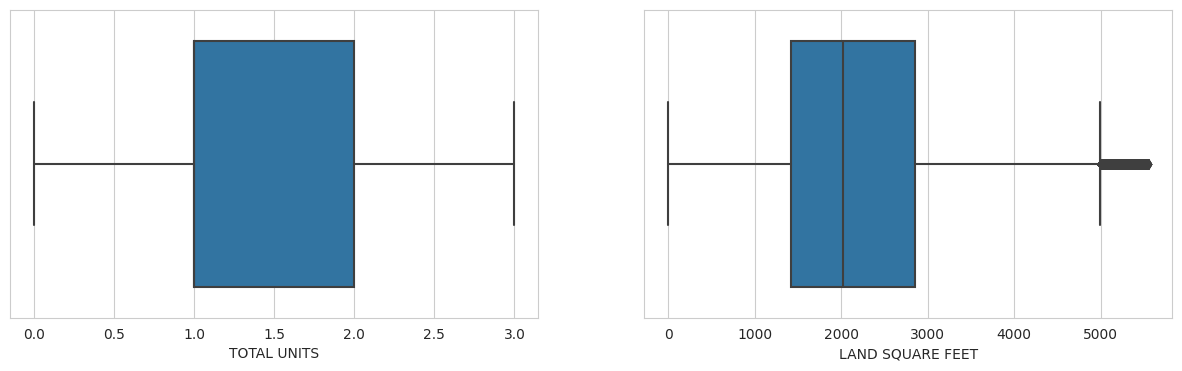

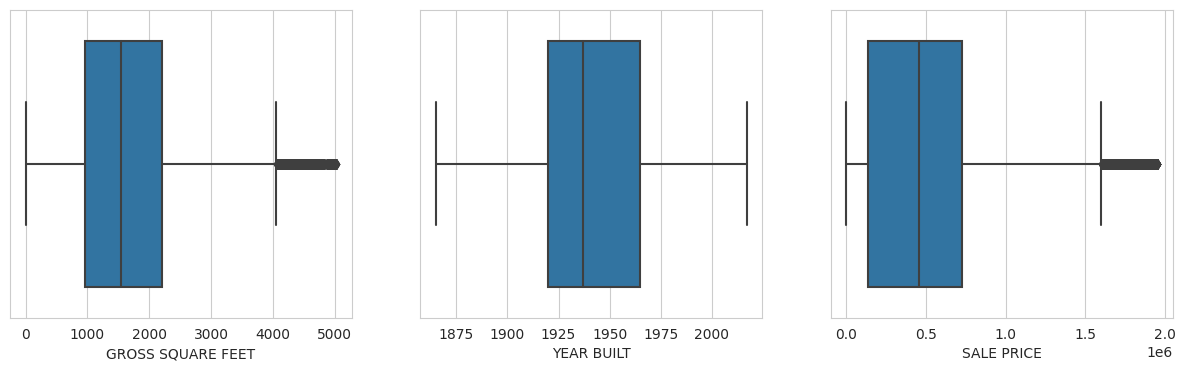

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'TOTAL UNITS', data = interval_variable)
sns.boxplot(ax = axes[1], x = 'LAND SQUARE FEET', data = interval_variable)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'GROSS SQUARE FEET', data = interval_variable)
sns.boxplot(ax = axes[1], x = 'YEAR BUILT', data = interval_variable)
sns.boxplot(ax = axes[2], x = 'SALE PRICE', data = interval_variable)

시각화2 - 히트맵으로 상관계수 관계 확인

<Axes: >

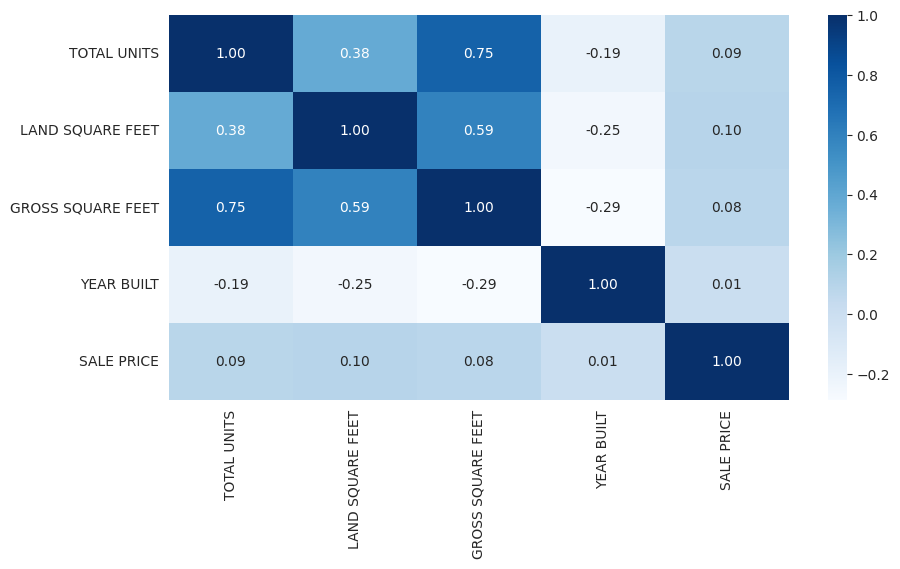

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(interval_variable.corr(), annot=True, fmt=".2f", cmap="Blues")

범주형 변수 시각화

시각화 3 - 막대그래프로 변수 구성 확인

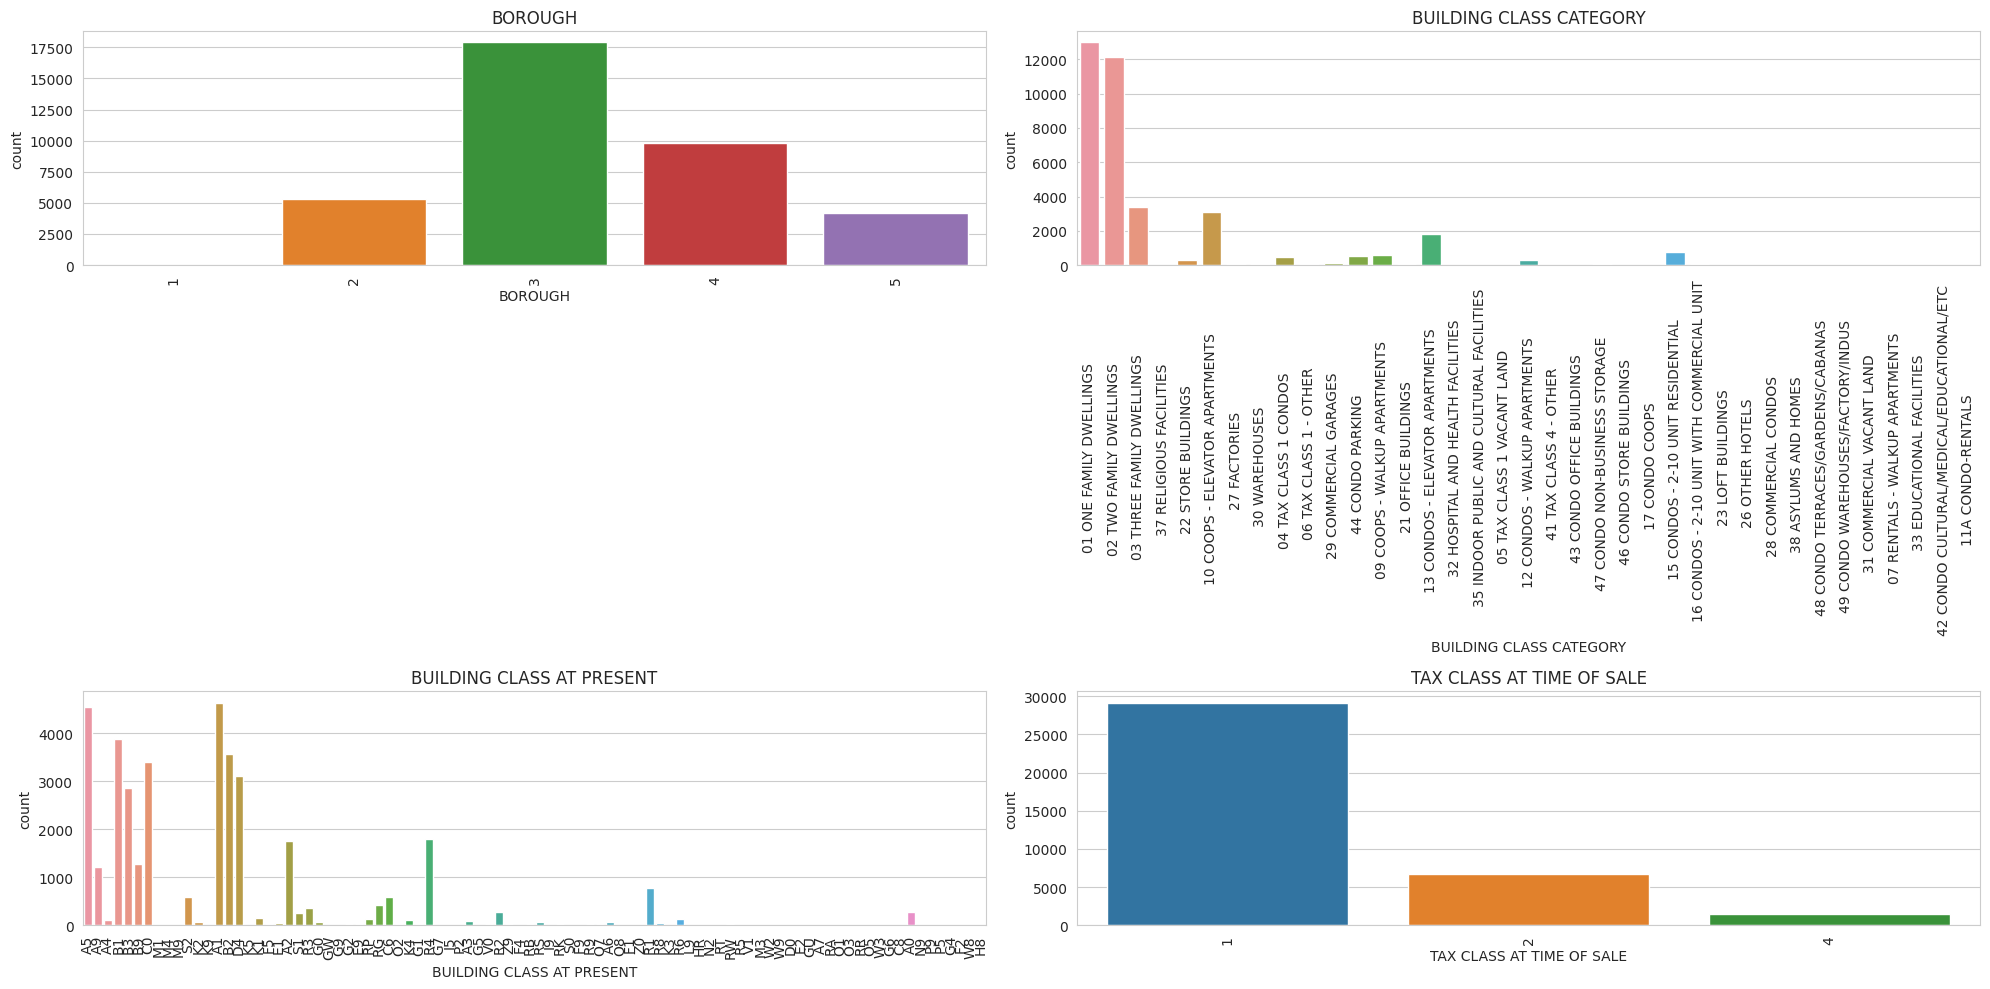

In [ ]:
categorical_variable = preprocessing_completed[['BOROUGH', 'BUILDING CLASS CATEGORY', 'BUILDING CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE', 'PRICE_B']]

fig, axes = plt.subplots(2,2, figsize=(20,10))

for i, col in enumerate(categorical_variable.columns[:-1]):
  sns.countplot(x=col, data=categorical_variable, ax=axes[i//2, i%2])
  axes[i//2, i%2].set_title(col)
  axes[i//2, i%2].tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.show()

In [ ]:
# BOROUGH
# frequency table 생성(개수 기준)
print(pd.crosstab(categorical_variable['BOROUGH'], columns='count'))
print()

# frequency table 생성(비율 기준)
print(pd.crosstab(categorical_variable['BOROUGH'], categorical_variable['PRICE_B'], normalize=True))

col_0    count
BOROUGH       
1           46
2         5314
3        17888
4         9785
5         4204

PRICE_B       0.0       1.0
BOROUGH                    
1        0.000242  0.000994
2        0.106346  0.036362
3        0.266267  0.214115
4        0.091414  0.171362
5        0.059914  0.052985


In [ ]:
# BUILDING CLASS CATEGORY
# frequency table 생성(개수 기준)
print(pd.crosstab(categorical_variable['BUILDING CLASS CATEGORY'], columns='count'))
print()

# frequency table 생성(비율 기준)
print(pd.crosstab(categorical_variable['BUILDING CLASS CATEGORY'], categorical_variable['PRICE_B'], normalize=True))

col_0                                         count
BUILDING CLASS CATEGORY                            
01 ONE FAMILY DWELLINGS                       12991
02 TWO FAMILY DWELLINGS                       12164
03 THREE FAMILY DWELLINGS                      3410
04 TAX CLASS 1 CONDOS                           487
05 TAX CLASS 1 VACANT LAND                       34
06 TAX CLASS 1 - OTHER                           70
07 RENTALS - WALKUP APARTMENTS                    2
09 COOPS - WALKUP APARTMENTS                    588
10 COOPS - ELEVATOR APARTMENTS                 3121
11A CONDO-RENTALS                                10
12 CONDOS - WALKUP APARTMENTS                   285
13 CONDOS - ELEVATOR APARTMENTS                1798
15 CONDOS - 2-10 UNIT RESIDENTIAL               777
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT       49
17 CONDO COOPS                                   30
21 OFFICE BUILDINGS                              77
22 STORE BUILDINGS                              322
23 LOFT BUIL

In [ ]:
# BUILDING CLASS AT PRESENT
# frequency table 생성(개수 기준)
print(pd.crosstab(categorical_variable['BUILDING CLASS AT PRESENT'], columns='count'))
print()

# frequency table 생성(비율 기준)
print(pd.crosstab(categorical_variable['BUILDING CLASS AT PRESENT'], categorical_variable['PRICE_B'], normalize=True))

col_0                      count
BUILDING CLASS AT PRESENT       
A0                           282
A1                          4637
A2                          1750
A3                            95
A4                           119
...                          ...
W3                             3
W8                             1
W9                             7
Z0                             2
Z9                            23

[90 rows x 1 columns]

PRICE_B                         0.0       1.0
BUILDING CLASS AT PRESENT                    
A0                         0.001584  0.005989
A1                         0.062921  0.061605
A2                         0.023606  0.023391
A3                         0.000591  0.001960
A4                         0.002148  0.001047
...                             ...       ...
W3                         0.000000  0.000081
W8                         0.000000  0.000027
W9                         0.000081  0.000107
Z0                         0.000054  0.00

In [ ]:
# BTAX CLASS AT TIME OF SALE
# frequency table 생성(개수 기준)
print(pd.crosstab(categorical_variable['TAX CLASS AT TIME OF SALE'], columns='count'))
print()

# frequency table 생성(비율 기준)
print(pd.crosstab(categorical_variable['TAX CLASS AT TIME OF SALE'], categorical_variable['PRICE_B'], normalize=True))

col_0                      count
TAX CLASS AT TIME OF SALE       
1                          29156
2                           6660
4                           1421

PRICE_B                         0.0       1.0
TAX CLASS AT TIME OF SALE                    
1                          0.393211  0.389774
2                          0.101190  0.077665
4                          0.029782  0.008379


구간 변수 t검정

In [ ]:
from scipy import stats
# TOTAL UNITS t-검정
data_TOTAL_UNITS_1 = interval_variable[categorical_variable['PRICE_B'] == 1]['TOTAL UNITS']
data_TOTAL_UNITS_0 = interval_variable[categorical_variable['PRICE_B'] == 0]['TOTAL UNITS']

stats.ttest_ind(data_TOTAL_UNITS_1, data_TOTAL_UNITS_0)

TtestResult(statistic=23.88786061735756, pvalue=3.593195777998719e-125, df=37235.0)

pvalue가 0.05보다 작으므로 귀무가설 기각

두 그룹의 TOTAL UNITS는 서로 다르다

In [ ]:
# LAND SQUARE FEET t-검정
data_LAND_SQUARE_FEET_1 = interval_variable[categorical_variable['PRICE_B'] == 1]['LAND SQUARE FEET']
data_LAND_SQUARE_FEET_0 = interval_variable[categorical_variable['PRICE_B'] == 0]['LAND SQUARE FEET']

stats.ttest_ind(data_LAND_SQUARE_FEET_1, data_LAND_SQUARE_FEET_0)

TtestResult(statistic=29.880858084198113, pvalue=6.854317514392228e-194, df=37235.0)

pvalue가 0.05보다 작으므로 귀무가설 기각

두 그룹의 LAND SQUARE FEET는 서로 다르다

In [ ]:
# GROSS SQUARE FEET t-검정
data_GROSS_SQUARE_FEET_1 = interval_variable[categorical_variable['PRICE_B'] == 1]['GROSS SQUARE FEET']
data_GROSS_SQUARE_FEET_0 = interval_variable[categorical_variable['PRICE_B'] == 0]['GROSS SQUARE FEET']

stats.ttest_ind(data_GROSS_SQUARE_FEET_1, data_GROSS_SQUARE_FEET_0)

TtestResult(statistic=20.416928314761886, pvalue=3.7863714204628153e-92, df=37235.0)

pvalue가 0.05보다 작으므로 귀무가설 기각

두 그룹의 GROSS SQUARE FEET는 서로 다르다

In [ ]:
# YEAR BUILT t-검정
data_YEAR_BUILT_1 = interval_variable[categorical_variable['PRICE_B'] == 1]['YEAR BUILT']
data_YEAR_BUILT_0 = interval_variable[categorical_variable['PRICE_B'] == 0]['YEAR BUILT']

stats.ttest_ind(data_YEAR_BUILT_1, data_YEAR_BUILT_0)

TtestResult(statistic=5.921799667766853, pvalue=3.21225246051237e-09, df=37235.0)

pvalue가 0.05보다 작으므로 귀무가설 기각

두 그룹의 YEAR BUILT는 서로 다르다

In [ ]:
import pandas as pd
new_column_names = {
    'BOROUGH' : 'BOROUGH',
    'BUILDING CLASS CATEGORY' : 'BUILDING_CLASS_CATEGORY',
    'BUILDING CLASS AT PRESENT': 'BUILDING_CLASS_AT_PRESENT',
    'TOTAL UNITS': 'TOTAL_UNITS',
    'LAND SQUARE FEET': 'LAND_SQUARE_FEET',
    'GROSS SQUARE FEET': 'GROSS_SQUARE_FEET',
    'YEAR BUILT': 'YEAR_BUILT',
    'TAX CLASS AT TIME OF SALE': 'TAX_CLASS_AT_TIME_OF_SALE',
    'SALE PRICE': 'SALE_PRICE',
    'PRICE_B' : 'PRICE_B'
}

df = preprocessing_completed.rename(columns=new_column_names)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37237 entries, 0 to 37236
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BOROUGH                    37237 non-null  int64 
 1   BUILDING_CLASS_CATEGORY    37237 non-null  object
 2   BUILDING_CLASS_AT_PRESENT  37237 non-null  object
 3   TOTAL_UNITS                37237 non-null  int64 
 4   LAND_SQUARE_FEET           37237 non-null  int64 
 5   GROSS_SQUARE_FEET          37237 non-null  int64 
 6   YEAR_BUILT                 37237 non-null  int64 
 7   TAX_CLASS_AT_TIME_OF_SALE  37237 non-null  int64 
 8   SALE_PRICE                 37237 non-null  int64 
 9   PRICE_B                    37237 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.8+ MB


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/preprocessing_completed.csv', index=False)

머신러닝 모델 수립


결정 트리, 로지스틱 회귀, 신경망 모델, K-최근접 이웃, 랜덤 포레스트, 그레디언트 부스팅, Lasso, SVM, XGBoost, LightGBM, 앙상블 등 여러 모델을 사용하여 가장 높은 정확도를 가지고 있는 모델 판별

머신 러닝 모델 실행

결정 트리 분류 모델

In [ ]:
!pip install -U imbalanced-learn
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
# OrdinalEncoder를 import 하여 범주형 데이터 변환
df_decisiontree = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/preprocessing_completed.csv')

from sklearn.preprocessing import OrdinalEncoder
df_decisiontree['BOROUGH_encoded'] = OrdinalEncoder().fit_transform(df_decisiontree['BOROUGH'].values.reshape(-1,1)) + 1
df_decisiontree['BUILDING_CLASS_CATEGORY_encoded'] = OrdinalEncoder().fit_transform(df_decisiontree['BUILDING_CLASS_CATEGORY'].values.reshape(-1,1))
df_decisiontree['BUILDING_CLASS_AT_PRESENT_encoded'] = OrdinalEncoder().fit_transform(df_decisiontree['BUILDING_CLASS_AT_PRESENT'].values.reshape(-1,1))
df_decisiontree['TAX_CLASS_AT_TIME_OF_SALE_encoded'] = OrdinalEncoder().fit_transform(df_decisiontree['TAX_CLASS_AT_TIME_OF_SALE'].values.reshape(-1,1)) + 1
df_decisiontree.head(3)

,BOROUGH,BUILDING_CLASS_CATEGORY,BUILDING_CLASS_AT_PRESENT,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE,PRICE_B,BOROUGH_encoded,BUILDING_CLASS_CATEGORY_encoded,BUILDING_CLASS_AT_PRESENT_encoded,TAX_CLASS_AT_TIME_OF_SALE_encoded
0,1,01 ONE FAMILY DWELLINGS,A5,1,384,1152,1901,1,1375000,1.0,1.0,0.0,5.0,1.0
1,1,01 ONE FAMILY DWELLINGS,A5,1,384,1152,1901,1,1375000,1.0,1.0,0.0,5.0,1.0
2,1,01 ONE FAMILY DWELLINGS,A9,1,1665,3200,1910,1,1510000,1.0,1.0,0.0,8.0,1.0


In [ ]:
df_decisiontree.groupby(['BOROUGH', 'BOROUGH_encoded']).size()

BOROUGH  BOROUGH_encoded
1        1.0                   46
2        2.0                 5314
3        3.0                17888
4        4.0                 9785
5        5.0                 4204
dtype: int64

In [ ]:
df_decisiontree.groupby(['BUILDING_CLASS_CATEGORY', 'BUILDING_CLASS_CATEGORY_encoded']).size()

BUILDING_CLASS_CATEGORY                       BUILDING_CLASS_CATEGORY_encoded
01 ONE FAMILY DWELLINGS                       0.0                                12991
02 TWO FAMILY DWELLINGS                       1.0                                12164
03 THREE FAMILY DWELLINGS                     2.0                                 3410
04 TAX CLASS 1 CONDOS                         3.0                                  487
05 TAX CLASS 1 VACANT LAND                    4.0                                   34
06 TAX CLASS 1 - OTHER                        5.0                                   70
07 RENTALS - WALKUP APARTMENTS                6.0                                    2
09 COOPS - WALKUP APARTMENTS                  7.0                                  588
10 COOPS - ELEVATOR APARTMENTS                8.0                                 3121
11A CONDO-RENTALS                             9.0                                   10
12 CONDOS - WALKUP APARTMENTS                 10.0  

In [ ]:
df_decisiontree.groupby(['BUILDING_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_PRESENT_encoded']).size()

BUILDING_CLASS_AT_PRESENT  BUILDING_CLASS_AT_PRESENT_encoded
A0                         0.0                                   282
A1                         1.0                                  4637
A2                         2.0                                  1750
A3                         3.0                                    95
A4                         4.0                                   119
                                                                ... 
W3                         85.0                                    3
W8                         86.0                                    1
W9                         87.0                                    7
Z0                         88.0                                    2
Z9                         89.0                                   23
Length: 90, dtype: int64

In [ ]:
df_decisiontree.groupby(['TAX_CLASS_AT_TIME_OF_SALE', 'TAX_CLASS_AT_TIME_OF_SALE_encoded']).size()

TAX_CLASS_AT_TIME_OF_SALE  TAX_CLASS_AT_TIME_OF_SALE_encoded
1                          1.0                                  29156
2                          2.0                                   6660
4                          3.0                                   1421
dtype: int64

In [ ]:
# 기존 범주형 변수 열 삭제
df_decisiontree.drop(['BOROUGH', 'BUILDING_CLASS_CATEGORY', 'BUILDING_CLASS_AT_PRESENT', 'TAX_CLASS_AT_TIME_OF_SALE'], axis=1, inplace=True)
df_decisiontree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37237 entries, 0 to 37236
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   TOTAL_UNITS                        37237 non-null  int64  
 1   LAND_SQUARE_FEET                   37237 non-null  int64  
 2   GROSS_SQUARE_FEET                  37237 non-null  int64  
 3   YEAR_BUILT                         37237 non-null  int64  
 4   SALE_PRICE                         37237 non-null  int64  
 5   PRICE_B                            37237 non-null  float64
 6   BOROUGH_encoded                    37237 non-null  float64
 7   BUILDING_CLASS_CATEGORY_encoded    37237 non-null  float64
 8   BUILDING_CLASS_AT_PRESENT_encoded  37237 non-null  float64
 9   TAX_CLASS_AT_TIME_OF_SALE_encoded  37237 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 2.8 MB


In [ ]:
# 타겟 변수 분할 및 비율 확인
import graphviz
import pandas as pd
import numpy as np

print("df_decisiontree shape : " + str(df_decisiontree.shape))
data = df_decisiontree.drop(['SALE_PRICE', 'PRICE_B'], axis=1)
target = df_decisiontree['PRICE_B']
print("data shape : ", data.shape)
print("target shape : ", target.shape)
df_decisiontree['PRICE_B'].value_counts(dropna=False, normalize=True)

df_decisiontree shape : (37237, 10)
data shape :  (37237, 8)
target shape :  (37237,)


0.0    0.524183
1.0    0.475817
Name: PRICE_B, dtype: float64

In [ ]:
# 7:3 비율로 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=4, stratify=target)
print("x_train shape : ", x_train.shape)
print("x_test shape : ", x_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)
y_train.value_counts(normalize=True)

x_train shape :  (26065, 8)
x_test shape :  (11172, 8)
y_train shape :  (26065,)
y_test shape :  (11172,)


0.0    0.52419
1.0    0.47581
Name: PRICE_B, dtype: float64

In [ ]:
# 결정 트리 모델(지니 기준)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Classifier로 DecisionTreeClassifier를 지정
tree = DecisionTreeClassifier(random_state=4)
# Classifier를 학습 데이터세트에서 학습시킴
model = tree.fit(x_train, y_train)
# 학습된 Classifier로 테스트데이터세트의 자료를 이용해서 타겟 변수 예측값을 생성
pred = model.predict(x_test)

print("Accuracy on training set : {:.5f}".format(model.score(x_train, y_train)))
print("Accuracy on test set : {:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on training set : 0.93532
Accuracy on test set : 0.64599


GridSearch를 실행하기 전 정확도 : 0.64599

In [ ]:
# 결정 트리 모델(지니 기준)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(criterion="gini", random_state=4, max_depth=5)

params = {'criterion':['gini', 'entropy'], 'max_depth':range(1, 21)}
grid_tree = GridSearchCV(
    tree, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_tree.fit(x_train, y_train)

print("GridSearchCV max accuracy : {:.5f}".format(grid_tree.best_score_))
print("GridSearchCV best parameter:", (grid_tree.best_params_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
GridSearchCV max accuracy : 0.67873
GridSearchCV best parameter: {'criterion': 'entropy', 'max_depth': 8}


In [ ]:
best_clf = grid_tree.best_estimator_
pred = best_clf.predict(x_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.67168


GridSearch를 실행한 후 데스트 데이터세트의 정확도 : 0.67168

bets parameter : {'criterion': 'entropy', 'max_depth': 8}

In [ ]:
# 최적 모델의 변수 중요도 수치 확인
print("Feature importances:")
print(best_clf.feature_importances_)

Feature importances:
[0.05283955 0.13478467 0.21893692 0.23696183 0.24583416 0.07768933
 0.03295353 0.        ]


In [ ]:
# 변수명을 리스트 형태로 만들기
feature_names = list(data.columns)
# 변수명을 index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기
dft = pd.DataFrame(np.round(best_clf.feature_importances_, 4), index=feature_names, columns=['Feature_importances'])
# Feature_importances의 값을 내림차순으로 정리
dft1 = dft.sort_values(by='Feature_importances', ascending=False)
dft1

,Feature_importances
BOROUGH_encoded,0.2458
YEAR_BUILT,0.2370
GROSS_SQUARE_FEET,0.2189
LAND_SQUARE_FEET,0.1348
BUILDING_CLASS_CATEGORY_encoded,0.0777
TOTAL_UNITS,0.0528
BUILDING_CLASS_AT_PRESENT_encoded,0.0330
TAX_CLASS_AT_TIME_OF_SALE_encoded,0.0000


<Axes: xlabel='Feature_importances'>

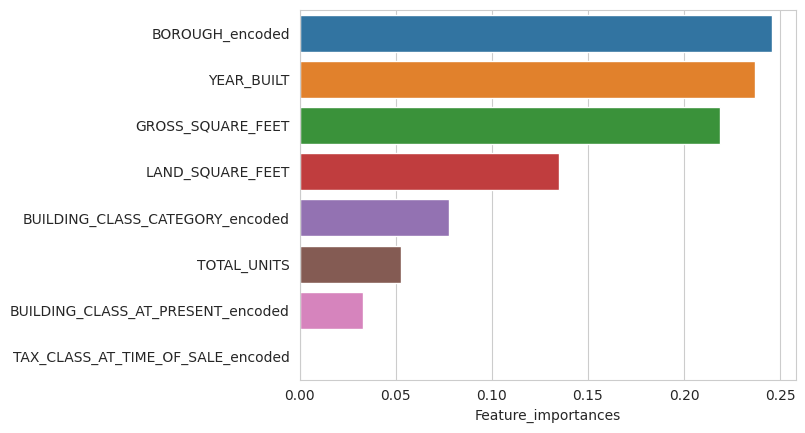

In [ ]:
# 데이터프레임 df1의 막대그래프 그리기
import seaborn as sns

sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

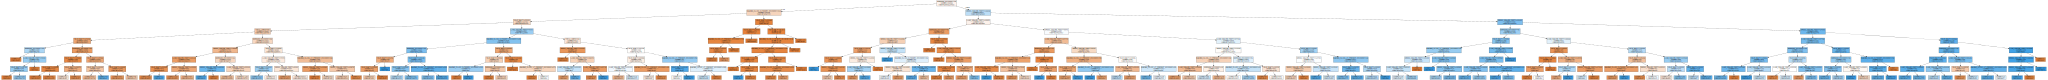

In [ ]:
# graphviz 불러오기
import graphviz
# model의 결과물을 tree.dot에 저장
from sklearn.tree import export_graphviz
export_graphviz(best_clf, out_file="tree.dot", feature_names=list(data.columns), impurity=False, filled=True)

# tree.dot을 graphviz 기능을 통해 출력
with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

로지스틱 회귀 분류 모델

In [ ]:
import pandas as pd
df_logisticregression = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/preprocessing_completed.csv')
print(df_logisticregression.shape)
df_logisticregression.head()

(37237, 10)


,BOROUGH,BUILDING_CLASS_CATEGORY,BUILDING_CLASS_AT_PRESENT,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE,PRICE_B
0,1,01 ONE FAMILY DWELLINGS,A5,1,384,1152,1901,1,1375000,1.0
1,1,01 ONE FAMILY DWELLINGS,A5,1,384,1152,1901,1,1375000,1.0
2,1,01 ONE FAMILY DWELLINGS,A9,1,1665,3200,1910,1,1510000,1.0
3,1,01 ONE FAMILY DWELLINGS,A9,1,1699,3536,1901,1,1595790,1.0
4,1,01 ONE FAMILY DWELLINGS,A4,1,2000,3360,1899,1,1000000,1.0


In [ ]:
# 범주형 변수 더미 변수 생성
col = ['BOROUGH', 'BUILDING_CLASS_CATEGORY', 'BUILDING_CLASS_AT_PRESENT', 'TAX_CLASS_AT_TIME_OF_SALE']
df_logisticregression = pd.get_dummies(df_logisticregression, columns=col)
df_logisticregression.head()

,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE,PRICE_B,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,...,BUILDING_CLASS_AT_PRESENT_V1,BUILDING_CLASS_AT_PRESENT_W2,BUILDING_CLASS_AT_PRESENT_W3,BUILDING_CLASS_AT_PRESENT_W8,BUILDING_CLASS_AT_PRESENT_W9,BUILDING_CLASS_AT_PRESENT_Z0,BUILDING_CLASS_AT_PRESENT_Z9,TAX_CLASS_AT_TIME_OF_SALE_1,TAX_CLASS_AT_TIME_OF_SALE_2,TAX_CLASS_AT_TIME_OF_SALE_4
0,1,384,1152,1901,1375000,1.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,384,1152,1901,1375000,1.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1665,3200,1910,1510000,1.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1699,3536,1901,1595790,1.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2000,3360,1899,1000000,1.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# 기준 더미 변수 제거
col = ['BOROUGH_3', 'BUILDING_CLASS_CATEGORY_01 ONE FAMILY DWELLINGS                    ', 'BUILDING_CLASS_AT_PRESENT_A1', 'TAX_CLASS_AT_TIME_OF_SALE_1']
df_logisticregression.drop(col, axis=1, inplace=True)
df_logisticregression.shape

(37237, 137)

In [ ]:
# 타겟 변수 설정
data = df_logisticregression.drop(['SALE_PRICE', 'PRICE_B'], axis=1)
target = df_logisticregression['PRICE_B']

# 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=4, stratify=target)
print("x_train shape : ", x_train.shape)
print("x_test shape : ", x_test.shape)

x_train shape :  (26065, 135)
x_test shape :  (11172, 135)


In [ ]:
# 로지스틱 회귀 기본 모델
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='lbfgs', penalty='none', random_state=4, n_jobs=-1)
model = lr.fit(x_train, y_train)
pred = model.predict(x_test)
print("Training set score{:.5f}".format(model.score(x_train, y_train)))
print("Test set score{:.5f}".format(accuracy_score(y_test, pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Training set score0.64044
Test set score0.62818


GridSearch를 실행하기 전 정확도 : 0.62818

In [ ]:
lr = LogisticRegression(solver='lbfgs', penalty='none', random_state=4, n_jobs=-1)

from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs', 'saga'], 'penalty':['none']}
grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_lr.fit(x_train, y_train)
print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchcv best parameter:", (grid_lr.best_params_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


GridSearchCV max accuracy:0.63691
GridSearchcv best parameter: {'penalty': 'none', 'solver': 'lbfgs'}


In [ ]:
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(x_test)
print("accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

accuracy on test set:0.62818


GridSearch를 실행한 후 데스트 데이터세트의 정확도 : 0.62818

bets parameter : {'penalty': 'none', 'solver': 'lbfgs'}

In [ ]:
# 변수명을 index로 만들고 coefficient값을 매칭한 데이터프레임 만들기
import numpy as np
feature_names = list(data.columns)
dft = pd.DataFrame(np.round(best_clf.coef_, 3).transpose(), index=feature_names, columns=['coef'])

# coef 값들을 오름차순으로 정리
dft1 = dft.sort_values(by='coef', ascending=True)
dft1

,coef
BOROUGH_2,-0.951
BUILDING_CLASS_AT_PRESENT_D4,-0.453
TAX_CLASS_AT_TIME_OF_SALE_4,-0.449
BUILDING_CLASS_CATEGORY_10 COOPS - ELEVATOR APARTMENTS,-0.448
BUILDING_CLASS_CATEGORY_44 CONDO PARKING,-0.340
...,...
BUILDING_CLASS_AT_PRESENT_R1,0.469
BUILDING_CLASS_AT_PRESENT_R4,0.780
BOROUGH_4,0.784
BUILDING_CLASS_CATEGORY_13 CONDOS - ELEVATOR APARTMENTS,0.785


In [ ]:
# coefficient값을 제곱한 오즈비값을 index에 매칭한 데이터프레임 만들기
feature_names = list(data.columns)
dft = pd.DataFrame(np.round(np.exp(best_clf.coef_), 3).transpose(), index=feature_names, columns=['Odds_ratio'])

# coef를 내림차순으로 정리
dft1 = dft.sort_values(by='Odds_ratio', ascending=False)
dft1

,Odds_ratio
TAX_CLASS_AT_TIME_OF_SALE_2,2.835
BUILDING_CLASS_CATEGORY_13 CONDOS - ELEVATOR APARTMENTS,2.193
BOROUGH_4,2.189
BUILDING_CLASS_AT_PRESENT_R4,2.181
BUILDING_CLASS_AT_PRESENT_R1,1.598
...,...
BUILDING_CLASS_CATEGORY_44 CONDO PARKING,0.712
BUILDING_CLASS_CATEGORY_10 COOPS - ELEVATOR APARTMENTS,0.639
TAX_CLASS_AT_TIME_OF_SALE_4,0.638
BUILDING_CLASS_AT_PRESENT_D4,0.635


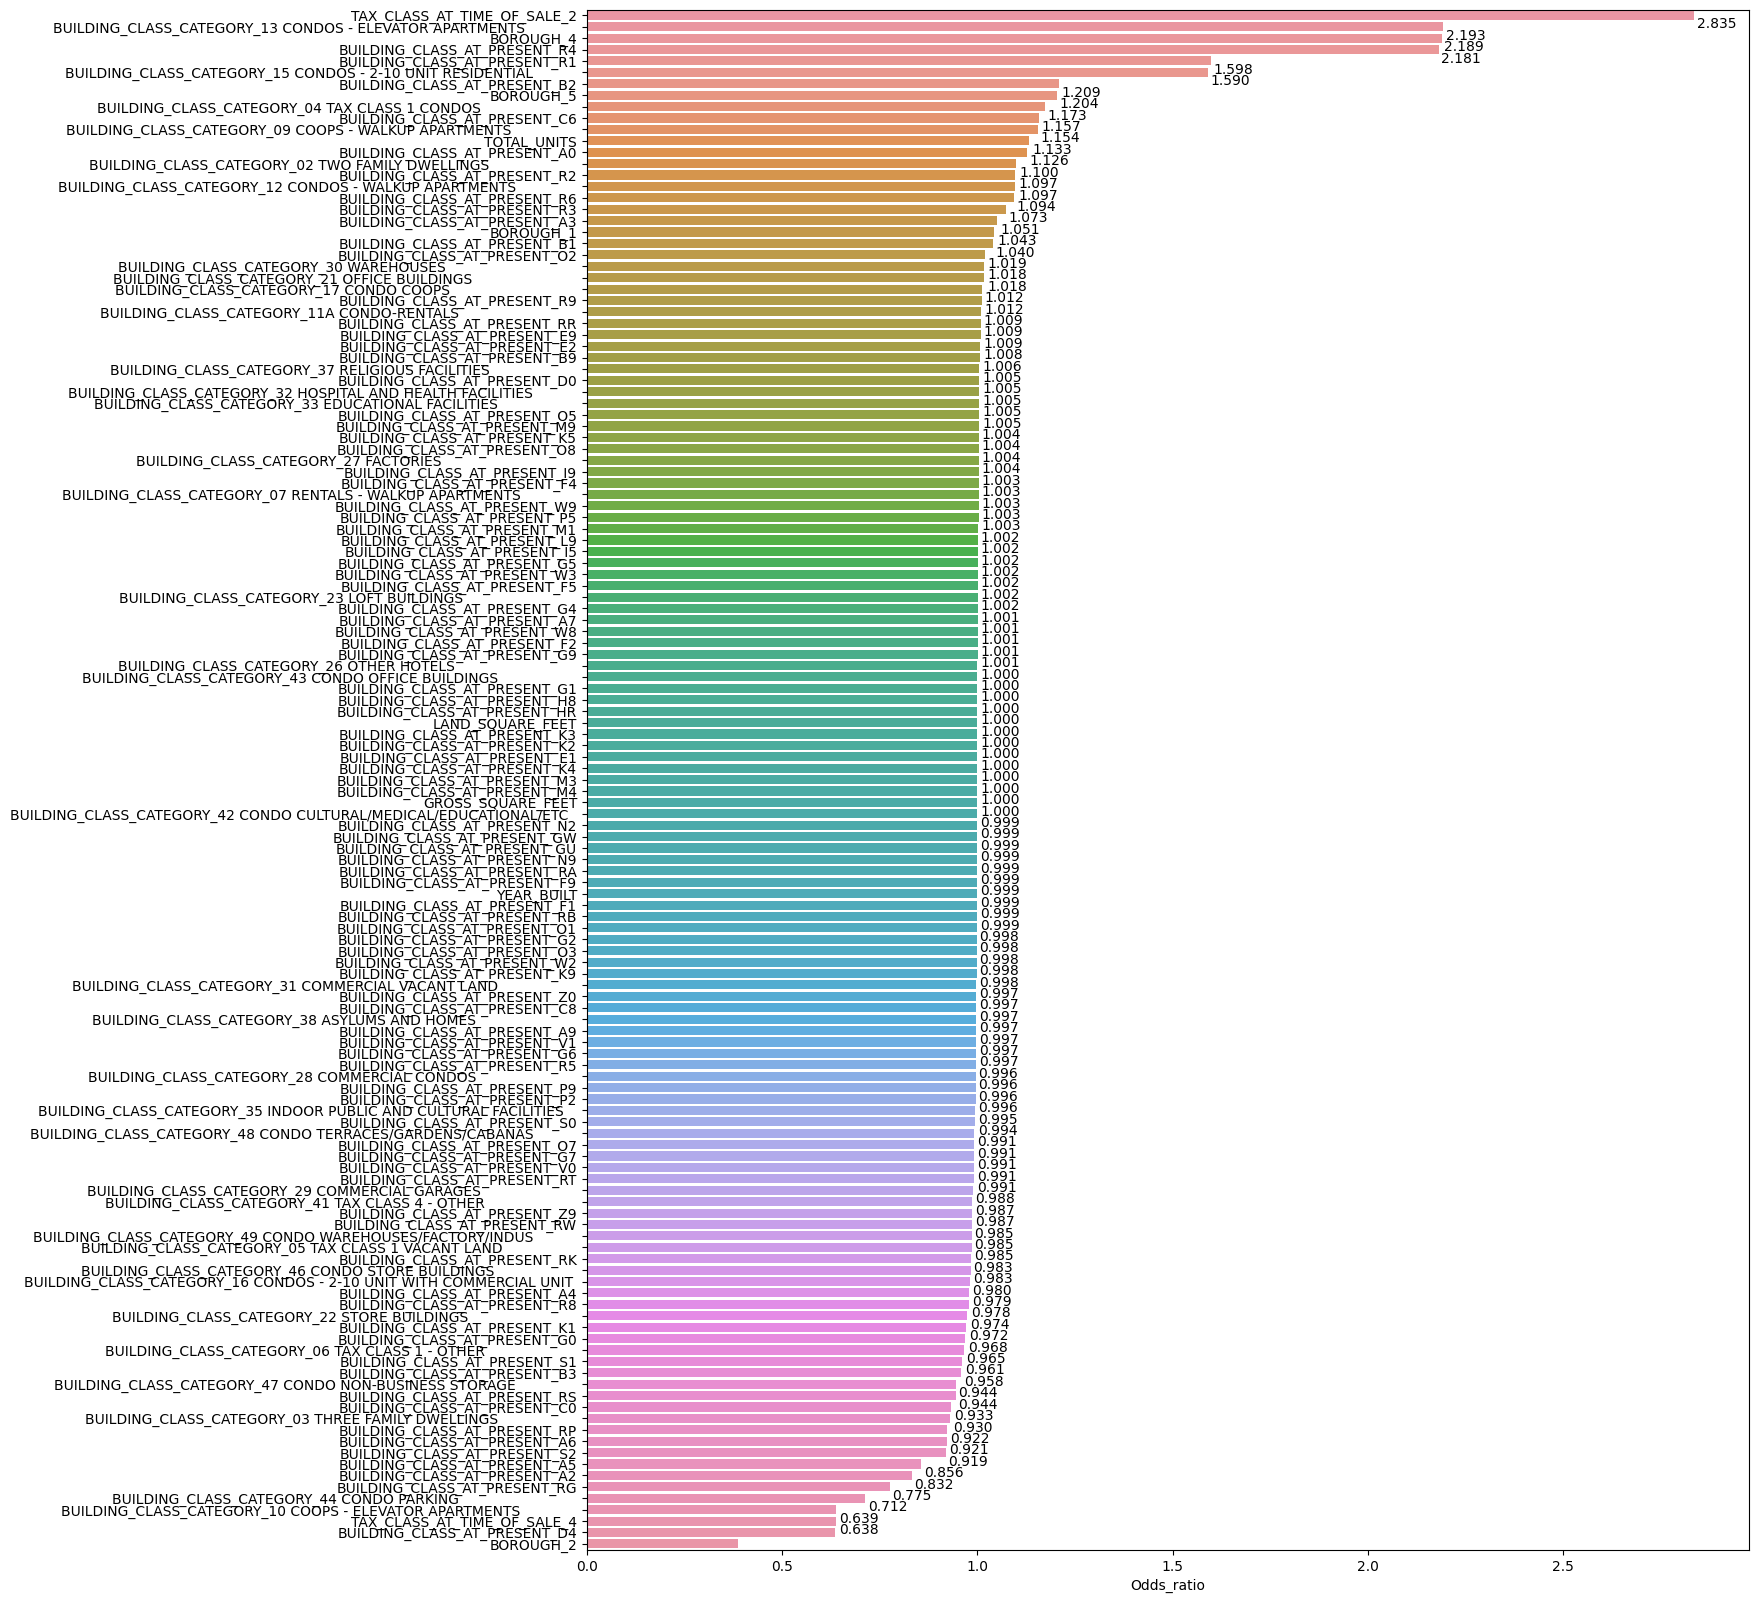

In [ ]:
# 데이터프레임 dft1의 막대그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15, 20))

ax = sns.barplot(y=dft1.index, x='Odds_ratio', data=dft1)

for p in ax.patches:
  ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 2.0), xytext=(2, 4), textcoords='offset points')

ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

plt.show()

오즈비 해석

구간변수

총 단위 수가 1 늘어날 경우 부동산 가격이 중위값보다 비쌀 확률은 13.3% 증가한다.

토지 면적과 건물 층의 총 면적은 부동산 가격과 관련이 없다.

건물이 지어진 연도가 1년 증가할 경우 부동산 가격이 중위값보다 비쌀 확률은 0.1% 감소한다.


범주형 변수

판매 시점의 세무급이 3가구 이내의 주거용재산인 경우와 비교하여 판매 시점의 세무급이 주거용인 기타 모든 부동산인 경우가 부동산 가격이 중위값보다 비쌀 가능성이 2.835배 높다.

빌딩의 종류가 01 ONE FAMILY DWELLINGS인 경우와 비교하여 빌딩의 종류가 13 CONDOS - ELEVATOR APARTMENTS인 경우가 부동산 가격이 중위값보다 비쌀 가능성이 2.193배 높다.

부동산 위치가 Brooklyn인 경우와 비교하여 부동산 위치가 Queens인 경우가 부동산 가격이 중위값보다 비쌀 가능성이 2.189배 높다.

부동산 위치가 Brooklyn인 경우와 비교하여 부동산 위치가 Bronx인 경우가 부동산 가격이 중위값보다 비쌀 가능성이 0.386배 낮다.

건물 분류가 A1인 경우와 비교하여 건물 분류가 D4인 경우가 부동산 가격이 중위값보다 비쌀 가능성이 0.635배 낮다.

판매 시점의 세무급이 3가구 이내 주거용 재산인 경우와 비교하여 판매시점의 세무급이 사무실, 공장, 차고, 건물 등인 경우가 부동산 가격이 중위값보다 비쌀 가능성이 0.638배 낮다.

표준화한 로지스틱 회귀 모델

In [ ]:
# 구간 변수들만 별도로 모아 데이터프레임 df_num을 만든다
numeric_cols = ['TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT']
df_num = df_logisticregression[numeric_cols]

# StandardScaler()로 데이터 스케일을 표준화하고, 결과를 데이터 프레임으로 만든다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_standard = pd.DataFrame(scaler.fit_transform(df_num))

# StandardScaler()는 변수명을 지우므로 데이터프레임에 다시 변수명을 넣는다
df_num_standard.columns = df_num.columns
df_num_standard.head()

,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT
0,-0.536784,-1.217275,-0.354950,-1.347547
1,-0.536784,-1.217275,-0.354950,-1.347547
2,-0.536784,-0.297825,1.593433,-1.083120
3,-0.536784,-0.273421,1.913090,-1.347547
4,-0.536784,-0.057376,1.745651,-1.406308


In [ ]:
# 원래 데이터프레임에서 구간 변수들을 제거하여 df_cat에 저장
df_cat = df_logisticregression.drop(numeric_cols, axis=1)

# 구간 변수 스케일을 표준화한 df_num_standard와 범주형 변수만 담은 df_cat을 병합
dfu_standard = pd.concat([df_num_standard, df_cat], axis=1)

# dfu의 변수명을 나열
dfu_standard.columns

Index(['TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'SALE_PRICE', 'PRICE_B', 'BOROUGH_1', 'BOROUGH_2', 'BOROUGH_4',
       'BOROUGH_5',
       ...
       'BUILDING_CLASS_AT_PRESENT_V0', 'BUILDING_CLASS_AT_PRESENT_V1',
       'BUILDING_CLASS_AT_PRESENT_W2', 'BUILDING_CLASS_AT_PRESENT_W3',
       'BUILDING_CLASS_AT_PRESENT_W8', 'BUILDING_CLASS_AT_PRESENT_W9',
       'BUILDING_CLASS_AT_PRESENT_Z0', 'BUILDING_CLASS_AT_PRESENT_Z9',
       'TAX_CLASS_AT_TIME_OF_SALE_2', 'TAX_CLASS_AT_TIME_OF_SALE_4'],
      dtype='object', length=137)

In [ ]:
# 표준화한 데이터세트로 로지스틱 회귀 재실행
data = dfu_standard.drop(['SALE_PRICE', 'PRICE_B'], axis=1)
target = dfu_standard['PRICE_B']

# 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=4, stratify=target)
print("x_train shape : ", x_train.shape)
print("x_test shape : ", x_test.shape)

x_train shape :  (26065, 135)
x_test shape :  (11172, 135)


In [ ]:
# 로지스틱 회귀 기본 모델
lr = LogisticRegression(solver='lbfgs', penalty='none', random_state=4, n_jobs=-1)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
parmas = {'solver':['lbfgs', 'saga'], 'penalty':['none']}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_lr.fit(x_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", grid_lr.best_params_)

best_clf = grid_lr.best_estimator_
pred = best_clf.predict(x_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


GridSearchCV max accuracy:0.64838
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'saga'}
Accuracy on test set:0.63883


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearch를 실행한 후 데스트 데이터세트의 정확도 : 0.63883

bets parameter : {'penalty': 'none', 'solver': 'saga'}

In [ ]:
dfu_standard.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/standard-scaled.csv', index=False)

사이킷런 신경망 분류 모델

In [ ]:
import pandas as pd
import numpy as np

df_neural_network_knn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/standard-scaled.csv')

data = df_neural_network_knn.drop(['SALE_PRICE', 'PRICE_B'], axis=1)
target = df_neural_network_knn['PRICE_B']

# 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=4, stratify=target)
print("x_train shape : ", x_train.shape)
print("x_test shape : ", x_test.shape)

x_train shape :  (26065, 135)
x_test shape :  (11172, 135)


In [ ]:
# 신경망 기본 모델
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf_mlp = MLPClassifier(max_iter=2000, random_state=4)
clf_mlp.fit(x_train, y_train)

# 학습된 Classifier로 테스트 데이터세트를 이용해서 타깃 변수의 예측값 생성
pred = clf_mlp.predict(x_test)
accuracy = accuracy_score(y_test, pred)

print("Training set score:{:.5f}".format(clf_mlp.score(x_train, y_train)))
print("Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Training set score:0.70708
Test set score:0.67365


In [ ]:
# 신경망 기본 모델
clf_mlp = MLPClassifier(max_iter=500, random_state=4)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV

params = {
    'solver': ['sgd', 'lbfgs', 'adam'],
    'activation': ['tanh', 'relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
}

grid_mlp = GridSearchCV(clf_mlp, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise')
grid_mlp.fit(x_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_mlp.best_score_))
print("GridSearchCV best parameter:", (grid_mlp.best_params_))

GridSearchCV max accuracy:0.68275
GridSearchCV best parameter: {'activation': 'relu', 'alpha': 0.0001, 'solver': 'adam'}


In [ ]:
best_clf = grid_mlp.best_estimator_
pred = best_clf.predict(x_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.67365


GridSearch를 실행한 후 데스트 데이터세트의 정확도 : 0.67365

bets parameter : {'activation': 'relu', 'alpha': 0.0001, 'solver': 'adam'}

In [ ]:
# 신경망 기본 모델
clf_mlp = MLPClassifier(max_iter=500, random_state=4)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV

params = {
    'solver': ['adam'],
    'activation': ['relu'],
    'alpha': [0.0001],
}

grid_mlp = GridSearchCV(clf_mlp, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise')
grid_mlp.fit(x_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_mlp.best_score_))
print("GridSearchCV best parameter:", (grid_mlp.best_params_))

GridSearchCV max accuracy:0.68275
GridSearchCV best parameter: {'activation': 'relu', 'alpha': 0.0001, 'solver': 'adam'}


최근접 이웃 분류 모델(KNN)

In [ ]:
import pandas as pd
import numpy as np

df_knn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/standard-scaled.csv')

data = df_knn.drop(['SALE_PRICE', 'PRICE_B'], axis=1)
target = df_knn['PRICE_B']

# 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=4, stratify=target)
print("x_train shape : ", x_train.shape)
print("x_test shape : ", x_test.shape)

x_train shape :  (26065, 135)
x_test shape :  (11172, 135)


In [ ]:
# KNN 모델
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(x_train, y_train)
# 학습된 Classifier로 테스트 데이터세트를 이용해서 타겟 변수 예측값을 생성
pred = clf_knn.predict(x_test)
accuracy = accuracy_score(y_test, pred)

print("Training set score:{:.5f}".format(clf_knn.score(x_train, y_train)))
print("Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Training set score:0.80203
Test set score:0.65942


In [ ]:
# KNN 모델
clf_knn = KNeighborsClassifier(n_neighbors=3)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors' : range(3, 31)}

grid_knn = GridSearchCV(clf_knn, param_grid=params, scoring='accuracy', cv=3, n_jobs=-1)
grid_knn.fit(x_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_knn.best_score_))
print("GridSearchCV best parameter:", (grid_knn.best_params_))

GridSearchCV max accuracy:0.67969
GridSearchCV best parameter: {'n_neighbors': 28}


In [ ]:
best_clf = grid_knn.best_estimator_
pred = best_clf.predict(x_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.67633


GridSearch를 실행한 후 데스트 데이터세트의 정확도 : 0.67633

bets parameter : {'n_neighbors': 28}

랜덤 포레스트

In [ ]:
import pandas as pd

# OrdinalEncoder를 import하여 범주형 데이터 변환
df_randomforest = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/preprocessing_completed.csv')

from sklearn.preprocessing import OrdinalEncoder
df_randomforest['BOROUGH_encoded'] = OrdinalEncoder().fit_transform(df_randomforest['BOROUGH'].values.reshape(-1,1)) + 1
df_randomforest['BUILDING_CLASS_CATEGORY_encoded'] = OrdinalEncoder().fit_transform(df_randomforest['BUILDING_CLASS_CATEGORY'].values.reshape(-1,1))
df_randomforest['BUILDING_CLASS_AT_PRESENT_encoded'] = OrdinalEncoder().fit_transform(df_randomforest['BUILDING_CLASS_AT_PRESENT'].values.reshape(-1,1))
df_randomforest['TAX_CLASS_AT_TIME_OF_SALE_encoded'] = OrdinalEncoder().fit_transform(df_randomforest['TAX_CLASS_AT_TIME_OF_SALE'].values.reshape(-1,1)) + 1
df_randomforest.head(3)

,BOROUGH,BUILDING_CLASS_CATEGORY,BUILDING_CLASS_AT_PRESENT,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE,PRICE_B,BOROUGH_encoded,BUILDING_CLASS_CATEGORY_encoded,BUILDING_CLASS_AT_PRESENT_encoded,TAX_CLASS_AT_TIME_OF_SALE_encoded
0,1,01 ONE FAMILY DWELLINGS,A5,1,384,1152,1901,1,1375000,1.0,1.0,0.0,5.0,1.0
1,1,01 ONE FAMILY DWELLINGS,A5,1,384,1152,1901,1,1375000,1.0,1.0,0.0,5.0,1.0
2,1,01 ONE FAMILY DWELLINGS,A9,1,1665,3200,1910,1,1510000,1.0,1.0,0.0,8.0,1.0


In [ ]:
df_randomforest.groupby(['BOROUGH', 'BOROUGH_encoded']).size()

BOROUGH  BOROUGH_encoded
1        1.0                   46
2        2.0                 5314
3        3.0                17888
4        4.0                 9785
5        5.0                 4204
dtype: int64

In [ ]:
df_randomforest.groupby(['BUILDING_CLASS_CATEGORY', 'BUILDING_CLASS_CATEGORY_encoded']).size()

BUILDING_CLASS_CATEGORY                       BUILDING_CLASS_CATEGORY_encoded
01 ONE FAMILY DWELLINGS                       0.0                                12991
02 TWO FAMILY DWELLINGS                       1.0                                12164
03 THREE FAMILY DWELLINGS                     2.0                                 3410
04 TAX CLASS 1 CONDOS                         3.0                                  487
05 TAX CLASS 1 VACANT LAND                    4.0                                   34
06 TAX CLASS 1 - OTHER                        5.0                                   70
07 RENTALS - WALKUP APARTMENTS                6.0                                    2
09 COOPS - WALKUP APARTMENTS                  7.0                                  588
10 COOPS - ELEVATOR APARTMENTS                8.0                                 3121
11A CONDO-RENTALS                             9.0                                   10
12 CONDOS - WALKUP APARTMENTS                 10.0  

In [ ]:
df_randomforest.groupby(['BUILDING_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_PRESENT_encoded']).size()

BUILDING_CLASS_AT_PRESENT  BUILDING_CLASS_AT_PRESENT_encoded
A0                         0.0                                   282
A1                         1.0                                  4637
A2                         2.0                                  1750
A3                         3.0                                    95
A4                         4.0                                   119
                                                                ... 
W3                         85.0                                    3
W8                         86.0                                    1
W9                         87.0                                    7
Z0                         88.0                                    2
Z9                         89.0                                   23
Length: 90, dtype: int64

In [ ]:
df_randomforest.groupby(['TAX_CLASS_AT_TIME_OF_SALE', 'TAX_CLASS_AT_TIME_OF_SALE_encoded']).size()

TAX_CLASS_AT_TIME_OF_SALE  TAX_CLASS_AT_TIME_OF_SALE_encoded
1                          1.0                                  29156
2                          2.0                                   6660
4                          3.0                                   1421
dtype: int64

In [ ]:
# 기존 범주형 변수 열 삭제
df_randomforest.drop(['BOROUGH', 'BUILDING_CLASS_CATEGORY', 'BUILDING_CLASS_AT_PRESENT', 'TAX_CLASS_AT_TIME_OF_SALE'], axis=1, inplace=True)
df_randomforest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37237 entries, 0 to 37236
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   TOTAL_UNITS                        37237 non-null  int64  
 1   LAND_SQUARE_FEET                   37237 non-null  int64  
 2   GROSS_SQUARE_FEET                  37237 non-null  int64  
 3   YEAR_BUILT                         37237 non-null  int64  
 4   SALE_PRICE                         37237 non-null  int64  
 5   PRICE_B                            37237 non-null  float64
 6   BOROUGH_encoded                    37237 non-null  float64
 7   BUILDING_CLASS_CATEGORY_encoded    37237 non-null  float64
 8   BUILDING_CLASS_AT_PRESENT_encoded  37237 non-null  float64
 9   TAX_CLASS_AT_TIME_OF_SALE_encoded  37237 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 2.8 MB


In [ ]:
df_randomforest.head()

,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE,PRICE_B,BOROUGH_encoded,BUILDING_CLASS_CATEGORY_encoded,BUILDING_CLASS_AT_PRESENT_encoded,TAX_CLASS_AT_TIME_OF_SALE_encoded
0,1,384,1152,1901,1375000,1.0,1.0,0.0,5.0,1.0
1,1,384,1152,1901,1375000,1.0,1.0,0.0,5.0,1.0
2,1,1665,3200,1910,1510000,1.0,1.0,0.0,8.0,1.0
3,1,1699,3536,1901,1595790,1.0,1.0,0.0,8.0,1.0
4,1,2000,3360,1899,1000000,1.0,1.0,0.0,4.0,1.0


In [ ]:
df_randomforest.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/encoded.csv', index=False)

In [ ]:
# 범주형 변수를 cols에 저장
cols = ['BOROUGH_encoded', 'BUILDING_CLASS_CATEGORY_encoded', 'BUILDING_CLASS_AT_PRESENT_encoded', 'TAX_CLASS_AT_TIME_OF_SALE_encoded', 'PRICE_B']

# 범주형 변수의 dtype을 category로 변경
df_randomforest[cols] = df_randomforest[cols].astype('category')
df_randomforest.dtypes

TOTAL_UNITS                             int64
LAND_SQUARE_FEET                        int64
GROSS_SQUARE_FEET                       int64
YEAR_BUILT                              int64
SALE_PRICE                              int64
PRICE_B                              category
BOROUGH_encoded                      category
BUILDING_CLASS_CATEGORY_encoded      category
BUILDING_CLASS_AT_PRESENT_encoded    category
TAX_CLASS_AT_TIME_OF_SALE_encoded    category
dtype: object

In [ ]:
data = df_randomforest.drop(['SALE_PRICE', 'PRICE_B'], axis=1)
target = df_randomforest['PRICE_B']
print("data shape : ", data.shape)
print("target shape : ", target.shape)

data shape :  (37237, 8)
target shape :  (37237,)


In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=4, stratify=target)

In [ ]:
# 랜덤 포레스트 모델(기본 모델, tree depth 제한 없음)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=4)
model = rf.fit(x_train, y_train)
# 학습된 Classifier로 테스트 데이터세트를 이용해서 타깃 변수 예측값 생성
pred = rf.predict(x_test)

print("Accuracy on training set:{:.5f}".format(model.score(x_train, y_train)))
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on training set:0.93528
Accuracy on test set:0.66971


In [ ]:
# 랜덤 포레스트 모델(기본 모델, tree depth 제한 없음)
rf = RandomForestClassifier(n_estimators=100, random_state=4)

from sklearn.model_selection import GridSearchCV
params = {"max_depth" : range(10, 41), 'n_estimators' : [100,200]}

grid_rf = GridSearchCV(rf, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_rf.fit(x_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_rf.best_score_))
print("GridSearchCV best parameter:", (grid_rf.best_params_))

GridSearchCV max accuracy:0.68705
GridSearchCV best parameter: {'max_depth': 17, 'n_estimators': 200}


In [ ]:
best_clf = grid_rf.best_estimator_
pred = best_clf.predict(x_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, best_clf.predict_proba(x_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.68188
ROC AUC on test set:0.76077


GridSearch를 실행한 후 데스트 데이터세트의 정확도 : 0.68188

ROC AUC값 : 0.76077

bets parameter : {'max_depth': 17, 'n_estimators': 200}

In [ ]:
print("Feature importances:")
print(best_clf.feature_importances_)

Feature importances:
[2.93513703e-02 1.64574799e-01 1.79022973e-01 2.14782287e-01
 1.44219037e-03 6.40281384e-02 1.05042905e-01 1.44402589e-02
 7.80379887e-03 3.25813817e-03 1.04256673e-03 6.01575982e-04
 6.77193525e-04 6.54625362e-05 9.87183321e-04 2.67275985e-02
 1.91744372e-04 9.28536163e-04 1.49413805e-02 5.40346610e-03
 7.99517419e-04 1.61218893e-04 5.77996744e-04 8.58749101e-04
 3.05158760e-05 0.00000000e+00 1.37590665e-04 6.05410294e-05
 5.42302686e-04 6.65236361e-04 2.48918967e-05 1.20825083e-04
 1.52920188e-04 1.38454346e-04 1.77187705e-04 2.81960332e-05
 1.38117976e-04 4.37199192e-06 2.51777997e-04 1.43429112e-02
 2.25592811e-04 1.42207075e-03 1.19514798e-04 2.47852343e-04
 4.27681916e-03 3.91063502e-03 1.15624302e-03 3.68924501e-04
 9.37023903e-03 2.47920761e-03 1.53856334e-05 1.96521286e-03
 3.84609891e-03 5.93829044e-03 2.85525591e-03 1.85662825e-03
 3.09535503e-03 1.68201860e-03 8.92164713e-05 1.82738179e-04
 2.86967608e-02 2.80734433e-04 1.75021393e-04 2.95541756e-04
 1.

In [ ]:
import numpy as np

# 변수명을 index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기
feature_names = list(data.columns)
dft = pd.DataFrame(np.round(best_clf.feature_importances_, 3), index=feature_names, columns=['Feature_importances'])

# Feature_importances의 값을 내림차순으로 정리
dft1 = dft.sort_values(by='Feature_importances', ascending=False)
dft1

,Feature_importances
YEAR_BUILT,0.215
GROSS_SQUARE_FEET,0.179
LAND_SQUARE_FEET,0.165
BOROUGH_4,0.105
BOROUGH_2,0.064
...,...
BUILDING_CLASS_AT_PRESENT_F4,0.000
BUILDING_CLASS_AT_PRESENT_F2,0.000
BUILDING_CLASS_AT_PRESENT_F1,0.000
BUILDING_CLASS_AT_PRESENT_E9,0.000


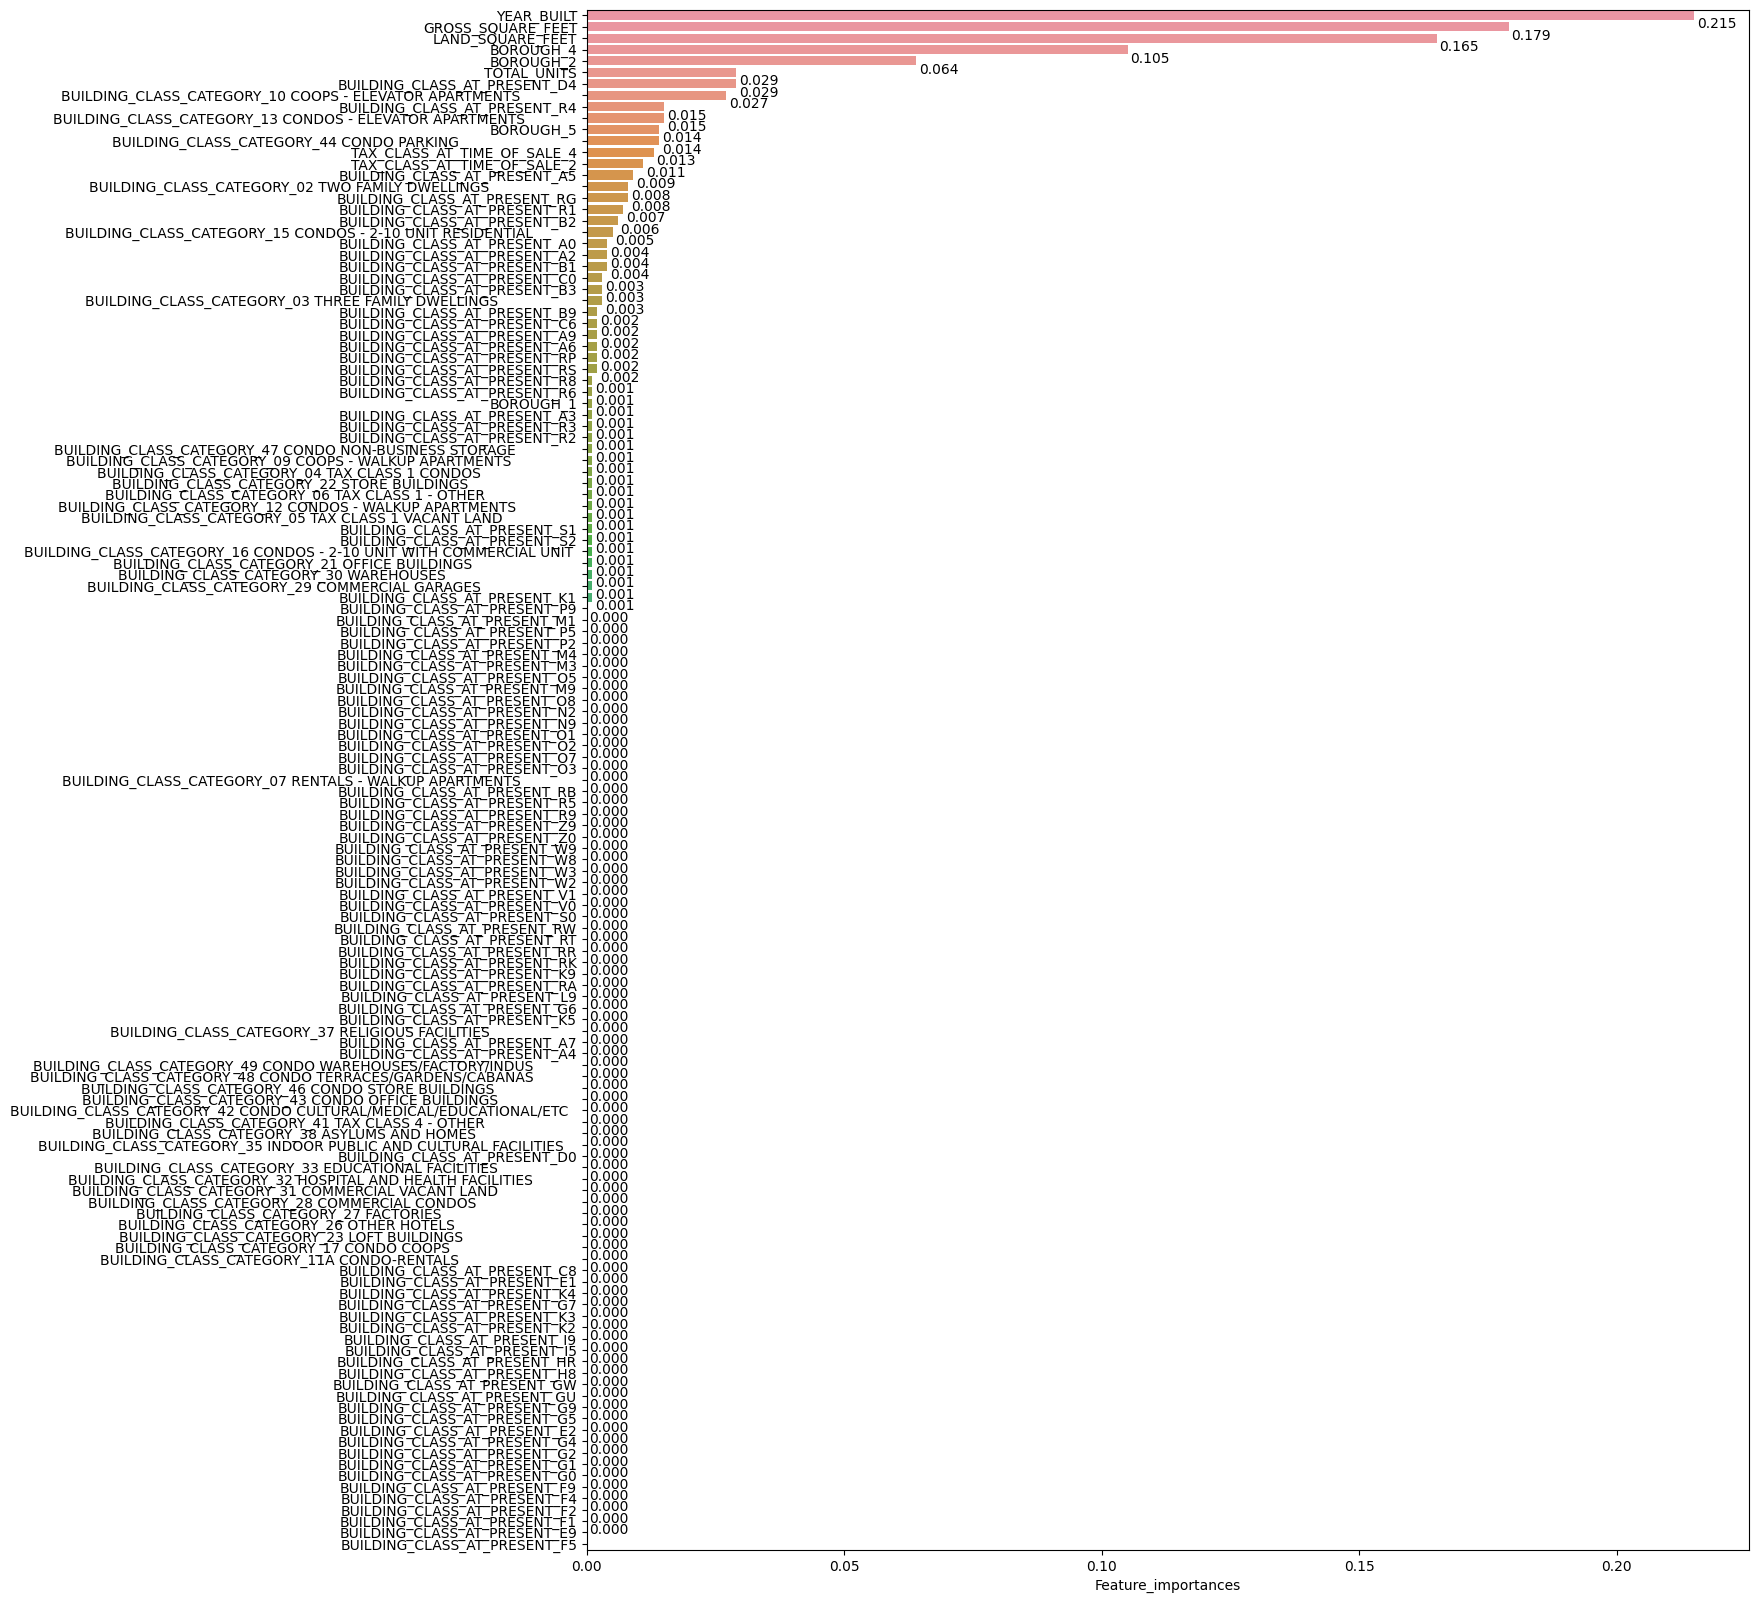

In [ ]:
# 데이터프레임 dft1의 막대그래프(barplot) 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(15, 20))
ax = sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

for p in ax.patches:
   ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 2.0), xytext=(2,4), textcoords='offset points')

그레디언트 부스팅 모델

In [ ]:
import pandas as pd
df_gradientboosting = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/encoded.csv')

In [ ]:
# 범주형 변수를 cols에 저장
cols = ['BOROUGH_encoded', 'BUILDING_CLASS_CATEGORY_encoded', 'BUILDING_CLASS_AT_PRESENT_encoded', 'TAX_CLASS_AT_TIME_OF_SALE_encoded', 'PRICE_B']

# 범주형 변수의 dtype을 category로 변경
df_gradientboosting[cols] = df_gradientboosting[cols].astype('category')
df_gradientboosting.dtypes

TOTAL_UNITS                             int64
LAND_SQUARE_FEET                        int64
GROSS_SQUARE_FEET                       int64
YEAR_BUILT                              int64
SALE_PRICE                              int64
PRICE_B                              category
BOROUGH_encoded                      category
BUILDING_CLASS_CATEGORY_encoded      category
BUILDING_CLASS_AT_PRESENT_encoded    category
TAX_CLASS_AT_TIME_OF_SALE_encoded    category
dtype: object

In [ ]:
data = df_gradientboosting.drop(['SALE_PRICE', 'PRICE_B'], axis=1)
target = df_gradientboosting['PRICE_B']
print("data shape : ", data.shape)
print("target shape : ", target.shape)

data shape :  (37237, 8)
target shape :  (37237,)


In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split

x_train, x_test, y_traom, y_test = train_test_split(data, target, test_size=0.3, random_state=4, stratify=target)

In [ ]:
# 그레디언트 부스팅 모델 (기본 모델)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gr = GradientBoostingClassifier(random_state=4)
model = gr.fit(x_train, y_train)
# 학습된 Classifier로 테스트 데이터세트를 이용해서 타깃 변수 예측값 생성
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)

print("Accuracy on training set:{:.5f}".format(model.score(x_train, y_train)))
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on training set:0.68763
Accuracy on test set:0.67061


In [ ]:
gr = GradientBoostingClassifier(random_state=4)

from sklearn.model_selection import GridSearchCV

params = {'max_depth':range(11, 16), 'n_estimators':[100, 200], 'learning_rate':[0.01, 0.1]}

grid_gr = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_gr.fit(x_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_gr.best_score_))
print("GridSearchCV best parameter:", (grid_gr.best_params_))

GridSearchCV max accuracy:0.68003
GridSearchCV best parameter: {'learning_rate': 0.01, 'max_depth': 11, 'n_estimators': 200}


In [ ]:
best_clf = grid_gr.best_estimator_
pred = best_clf.predict(x_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, best_clf.predict_proba(x_test)[:,1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.68090
ROC AUC on test set:0.75943


GridSearch를 실행한 후 데스트 데이터세트의 정확도 : 0.68090

ROC AUC값 : 0.75943

bets parameter : {'learning_rate': 0.01, 'max_depth': 11, 'n_estimators': 200}

In [ ]:
# 데이터프레임의 행과 열 전체를 보이게 하는 조치
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

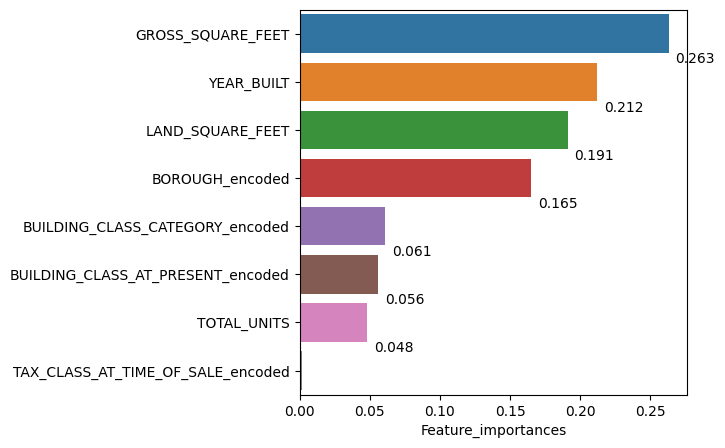

In [ ]:
import numpy as np

# 변수명을 index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기

feature_names = list(data.columns)
dft = pd.DataFrame(np.round(best_clf.feature_importances_,3), index=feature_names, columns=['Feature_importances'])
dft1 = dft.sort_values(by='Feature_importances', ascending=False)

# 데이터프레임 dft1의 막대그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

for p in ax.patches:
  ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 1.3), xytext=(5, 10), textcoords='offset points')

라쏘 (로지스틱 회귀) 모델

In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/encoded.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37237 entries, 0 to 37236
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   TOTAL_UNITS                        37237 non-null  int64  
 1   LAND_SQUARE_FEET                   37237 non-null  int64  
 2   GROSS_SQUARE_FEET                  37237 non-null  int64  
 3   YEAR_BUILT                         37237 non-null  int64  
 4   SALE_PRICE                         37237 non-null  int64  
 5   PRICE_B                            37237 non-null  float64
 6   BOROUGH_encoded                    37237 non-null  float64
 7   BUILDING_CLASS_CATEGORY_encoded    37237 non-null  float64
 8   BUILDING_CLASS_AT_PRESENT_encoded  37237 non-null  float64
 9   TAX_CLASS_AT_TIME_OF_SALE_encoded  37237 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 2.8 MB


In [2]:
cols = ['TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'SALE_PRICE', 'PRICE_B']
df_cat = df.drop(cols, axis=1)  # 구간 변수 및 타겟 변수 제외
df_cat.shape

(37237, 4)

In [3]:
pd.options.display.float_format = '{:.2f}'.format # 소수점 2자리로 숫자 표기 제한
df_cat.describe()

,BOROUGH_encoded,BUILDING_CLASS_CATEGORY_encoded,BUILDING_CLASS_AT_PRESENT_encoded,TAX_CLASS_AT_TIME_OF_SALE_encoded
count,37237.00,37237.00,37237.00,37237.00
mean,3.34,3.21,17.23,1.26
std,0.86,5.83,21.55,0.52
min,1.00,0.00,0.00,1.00
25%,3.00,0.00,5.00,1.00
50%,3.00,1.00,10.00,1.00
75%,4.00,2.00,14.00,1.00
max,5.00,36.00,89.00,3.00


In [4]:
df_cat.max() - df_cat.min()

BOROUGH_encoded                      4.00
BUILDING_CLASS_CATEGORY_encoded     36.00
BUILDING_CLASS_AT_PRESENT_encoded   89.00
TAX_CLASS_AT_TIME_OF_SALE_encoded    2.00
dtype: float64

In [5]:
df_cat.min()

BOROUGH_encoded                     1.00
BUILDING_CLASS_CATEGORY_encoded     0.00
BUILDING_CLASS_AT_PRESENT_encoded   0.00
TAX_CLASS_AT_TIME_OF_SALE_encoded   1.00
dtype: float64

In [6]:
cols1 = ['BOROUGH_encoded', 'BUILDING_CLASS_CATEGORY_encoded', 'BUILDING_CLASS_AT_PRESENT_encoded', 'TAX_CLASS_AT_TIME_OF_SALE_encoded']
df_lasso = pd.get_dummies(df, columns=cols1)

In [7]:
df_lasso.head()

,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE,PRICE_B,BOROUGH_encoded_1.0,BOROUGH_encoded_2.0,BOROUGH_encoded_3.0,BOROUGH_encoded_4.0,...,BUILDING_CLASS_AT_PRESENT_encoded_83.0,BUILDING_CLASS_AT_PRESENT_encoded_84.0,BUILDING_CLASS_AT_PRESENT_encoded_85.0,BUILDING_CLASS_AT_PRESENT_encoded_86.0,BUILDING_CLASS_AT_PRESENT_encoded_87.0,BUILDING_CLASS_AT_PRESENT_encoded_88.0,BUILDING_CLASS_AT_PRESENT_encoded_89.0,TAX_CLASS_AT_TIME_OF_SALE_encoded_1.0,TAX_CLASS_AT_TIME_OF_SALE_encoded_2.0,TAX_CLASS_AT_TIME_OF_SALE_encoded_3.0
0,1,384,1152,1901,1375000,1.00,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,384,1152,1901,1375000,1.00,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1665,3200,1910,1510000,1.00,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,1699,3536,1901,1595790,1.00,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2000,3360,1899,1000000,1.00,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
df_lasso.shape

(37237, 141)

In [9]:
list(df_lasso.columns)

['TOTAL_UNITS',
 'LAND_SQUARE_FEET',
 'GROSS_SQUARE_FEET',
 'YEAR_BUILT',
 'SALE_PRICE',
 'PRICE_B',
 'BOROUGH_encoded_1.0',
 'BOROUGH_encoded_2.0',
 'BOROUGH_encoded_3.0',
 'BOROUGH_encoded_4.0',
 'BOROUGH_encoded_5.0',
 'BUILDING_CLASS_CATEGORY_encoded_0.0',
 'BUILDING_CLASS_CATEGORY_encoded_1.0',
 'BUILDING_CLASS_CATEGORY_encoded_2.0',
 'BUILDING_CLASS_CATEGORY_encoded_3.0',
 'BUILDING_CLASS_CATEGORY_encoded_4.0',
 'BUILDING_CLASS_CATEGORY_encoded_5.0',
 'BUILDING_CLASS_CATEGORY_encoded_6.0',
 'BUILDING_CLASS_CATEGORY_encoded_7.0',
 'BUILDING_CLASS_CATEGORY_encoded_8.0',
 'BUILDING_CLASS_CATEGORY_encoded_9.0',
 'BUILDING_CLASS_CATEGORY_encoded_10.0',
 'BUILDING_CLASS_CATEGORY_encoded_11.0',
 'BUILDING_CLASS_CATEGORY_encoded_12.0',
 'BUILDING_CLASS_CATEGORY_encoded_13.0',
 'BUILDING_CLASS_CATEGORY_encoded_14.0',
 'BUILDING_CLASS_CATEGORY_encoded_15.0',
 'BUILDING_CLASS_CATEGORY_encoded_16.0',
 'BUILDING_CLASS_CATEGORY_encoded_17.0',
 'BUILDING_CLASS_CATEGORY_encoded_18.0',
 'BUILDING

In [14]:
# 기준 더미변수로 정한 4개의 더미변수명을 cols2에 저장
cols2 = ['BOROUGH_encoded_3.0', 'BUILDING_CLASS_CATEGORY_encoded_0.0', 'BUILDING_CLASS_AT_PRESENT_encoded_1.0', 'TAX_CLASS_AT_TIME_OF_SALE_encoded_1.0']
df_lasso.drop(cols2, axis=1, inplace=True)  # cols2에 저장된 더미 변수명을 데이터프레임에서 제거
df_lasso.shape

(37237, 137)

In [15]:
data = df_lasso.drop(['SALE_PRICE', 'PRICE_B'], axis=1)
target = df_lasso['PRICE_B']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=4)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (26065, 135)
x_test shape: (11172, 135)


In [24]:
# 라쏘 모델(liblinear를 사용한 기본 모델)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
ls = LogisticRegression(penalty="l1", solver='liblinear', C=1, random_state=4)
model = ls.fit(x_train, y_train)
# 학습된 Classifier로 테스트 데이터세트를 이용해서 타깃 변수 예측값 생성
pred = model.predict(x_test)

print("Accuracy on training set:{:.5f}".format(model.score(x_train, y_train)))
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on training set:0.64500
Accuracy on test set:0.64304


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [27]:
# 라쏘 모델(liblinear를 사용한 기본 모델)
ls = LogisticRegression(penalty='l1', solver='liblinear', C=1, random_state=4)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV

params = {'solver':['lbfgs', 'iblinear', 'sag', 'saga'],
          'C':[0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 10, 100]}

grid_ls = GridSearchCV(ls, param_grid=params, scoring='accuracy', cv=5,n_jobs=-1)
grid_ls.fit(x_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_ls.best_score_))
print("GridSearchCV best parameter:", (grid_ls.best_params_))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

GridSearchCV max accuracy:0.57057
GridSearchCV best parameter: {'C': 0.1, 'solver': 'saga'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [29]:
best_clf = grid_ls.best_estimator_
pred = best_clf.predict(x_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, best_clf.predict_proba(x_test)[:,1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.57223
ROC AUC on test set:0.59019


GridSearch를 실행한 후 데스트 데이터세트의 정확도 : 0.57223

ROC AUC값 : 0.59019

bets parameter : {'C': 0.1, 'solver': 'saga'}

In [31]:
import numpy as np
print("Number of features used:", np.sum(best_clf.coef_ != 0))

Number of features used: 43


In [32]:
print("회귀계수", best_clf.coef_)

회귀계수 [[ 1.82476174e-03  1.99895137e-04  4.45860321e-05 -2.96865146e-04
   0.00000000e+00 -2.67850380e-03  3.14860607e-03 -5.08958587e-04
   7.23790234e-04  0.00000000e+00  1.20899247e-04  0.00000000e+00
  -1.72896488e-05  0.00000000e+00  1.32736418e-04 -1.30254744e-03
   0.00000000e+00  6.62348173e-05  1.57130077e-03  5.96199003e-04
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.93627934e-05
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.02237725e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.24920791e-04
   0.00000000e+00 -3.34825068e-05  0.00000000e+00  0.00000000e+00
   1.11872259e-04 -2.33390526e-04  1.06038799e-05 -1.97566565e-05
  -5.99346560e-04 -5.54777929e-05  0.00000000e+00 -7.45227222e-05
   0.00000000e+00  5.77580526e-04  1.58337352e-04 -2.50135512e-07
   0.00000000e+00  1.36461936e-04  0.00000000e+00  0.00000000e+00
  -1.

In [33]:
feature_names = list(data.columns)
# 변수 index에 coefficient값을 매칭해 데이터프레임으로 저장
dft = pd.DataFrame(best_clf.coef_.transpose(), index=feature_names, columns=['coef'])
dft1 = dft.sort_values(by='coef', ascending=False)
dft1

,coef
BOROUGH_encoded_4.0,0.00
TOTAL_UNITS,0.00
BUILDING_CLASS_CATEGORY_encoded_11.0,0.00
BUILDING_CLASS_AT_PRESENT_encoded_65.0,0.00
TAX_CLASS_AT_TIME_OF_SALE_encoded_2.0,0.00
...,...
BUILDING_CLASS_AT_PRESENT_encoded_5.0,-0.00
TAX_CLASS_AT_TIME_OF_SALE_encoded_3.0,-0.00
BUILDING_CLASS_CATEGORY_encoded_8.0,-0.00
BUILDING_CLASS_AT_PRESENT_encoded_17.0,-0.00


In [34]:
# 오즈비 계산
feature_names = list(data.columns)  # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.exp(best_clf.coef_).transpose(), index=feature_names, columns=['Odds_ratio'])
dft1 = dft.sort_values(by='Odds_ratio', ascending=False)  # 컬럼 coef의 값들을 내림차순으로 정리
dft1

,Odds_ratio
BOROUGH_encoded_4.0,1.00
TOTAL_UNITS,1.00
BUILDING_CLASS_CATEGORY_encoded_11.0,1.00
BUILDING_CLASS_AT_PRESENT_encoded_65.0,1.00
TAX_CLASS_AT_TIME_OF_SALE_encoded_2.0,1.00
...,...
BUILDING_CLASS_AT_PRESENT_encoded_5.0,1.00
TAX_CLASS_AT_TIME_OF_SALE_encoded_3.0,1.00
BUILDING_CLASS_CATEGORY_encoded_8.0,1.00
BUILDING_CLASS_AT_PRESENT_encoded_17.0,1.00


In [35]:
# 오즈비가 1(계숫값이 0)인 변수를 제거
dft2 = dft1[dft1['Odds_ratio'] != 1]
dft2.shape

(43, 1)

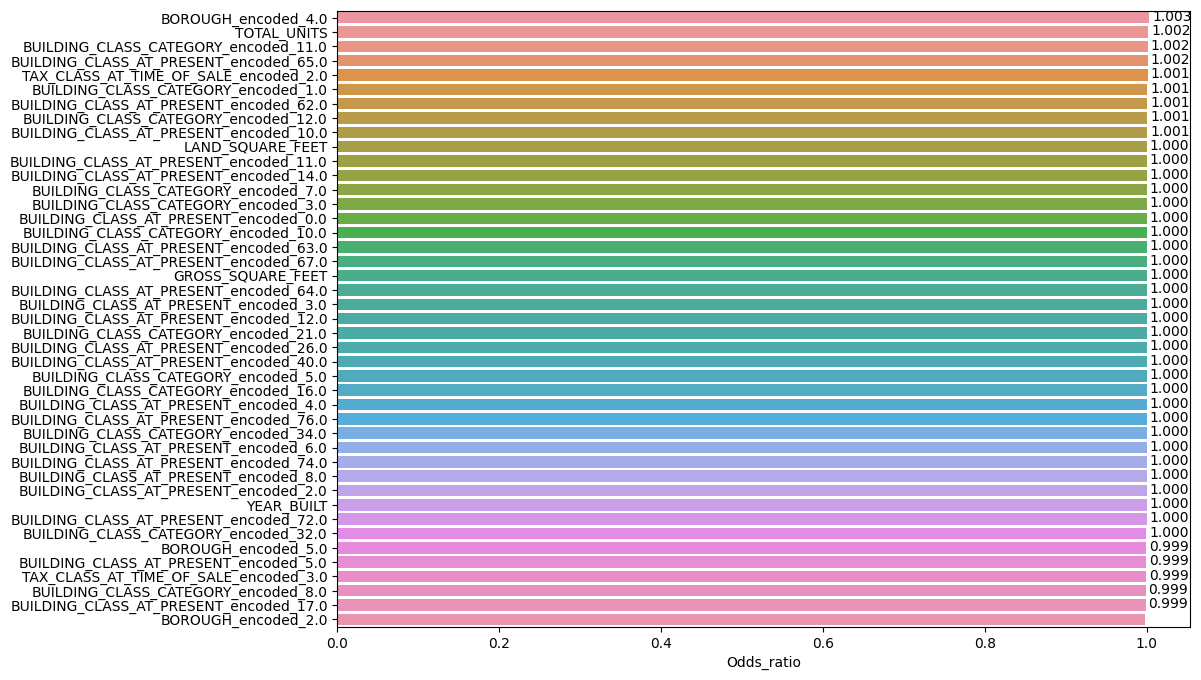

In [42]:
# 데이터프레임 dft2의 막대그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax= plt.subplots(figsize=(11,8))
ax = sns.barplot(y=dft2.index, x="Odds_ratio", data=dft2)

for p in ax.patches:
  ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.0),
                xytext=(2, 4), textcoords='offset points')

오즈비 해석

구간변수

총 단위 수가 1 늘어날 경우 부동산 가격이 중위값보다 비쌀 확률은 0.3% 증가한다.

토지 면적이 1 늘어날 경우 부동산 가격이 중위값보다 비쌀 확률은 0.01% 증가한다.

건물 층의 총 면적이 1 늘어날 경우 부동산 가격이 중위값보다 비쌀 확률은 0.004% 증가한다.

건물이 지어진 연도가 1년 증가할 경우 부동산 가격이 중위값보다 비쌀 확률은 0.03% 감소한다.


범주형 변수

부동산 위치가 Brooklyn인 경우와 비교하여 부동산 위치가 Queens인 경우가 부동산 가격이 중위값보다 비쌀 가능성이 1.003배 높다.

빌딩의 종류가 01 ONE FAMILY DWELLINGS인 경우와 비교하여 빌딩의 종류가 13 CONDOS - ELEVATOR APARTMENTS인 경우가 부동산 가격이 중위값보다 비쌀 가능성이 1.001배 높다.

건물 분류가 A1인 경우와 비교하여 건물 분류가 R4인 경우가 부동산 가격이 중위값보다 비쌀 가능성이 1.001배 높다.

부동산 위치가 Brooklyn인 경우와 비교하여 부동산 위치가 Bronx인 경우가 부동산 가격이 중위값보다 비쌀 가능성이 0.997배 낮다.

건물 분류가 A1인 경우와 비교하여 건물 분류가 D4인 경우가 부동산 가격이 중위값보다 비쌀 가능성이 0.998배 낮다.

빌딩의 종류가 01 ONE FAMILY DWELLINGS인 경우와 비교하여 빌딩의 종류가 10 COOPS - ELEVATOR APARTMENTS인 경우가 부동산 가격이 중위값보다 비쌀 가능성이 0.998배 낮다.

신경망 모델